# Loyalty Segmentation for Retail Growth

## Project Goal: Segment, Quantify, and Act on Customer Loyalty

This project helps **retail founders, operators, and analysts** turn raw customer data into **loyalty intelligence** revealing who their most loyal customers are, how they behave, and how to retain them with precision.

Retailers collect vast data through loyalty programs, digital platforms, and point-of-sale systems. But most lack visibility. They treat all customers the same, send generic offers, and miss the signals that drive repeat revenue.

A founder put it simply:

> “We collect customer data, but we don’t know who our loyal customers are or how to keep them.”  

## Business Impact Summary

- Found the customer segments driving most of the revenue. Champions alone contribute 68%  
- Uncovered £3.8M in retention potential from Loyalists and At Risk customers  
- Highlighted repeat-buy products ideal for bundles, upsells, and loyalty campaigns  
- Flagged bulk-driven products to adjust pricing and avoid misleading popularity metrics  
- Identified the best time to run campaigns, Thursday mornings at 11AM  
- Focused loyalty strategy on the UK, where most customers and repeat buyers are concentrated  
- Prioritized retention over reactivation to save time and resources  
- Delivered clear, ready-to-use actions to grow revenue and customer lifetime value

For those who want to explore the work on Github:

👉 [Loyalty Segmentation for Retail Growth](https://github.com/Wilfrida-Were/Loyalty-Segmentation-for-Retail-Growth/blob/main/README.md)

## 📑 Table of Contents
* [Interactive Dashboard](#dashboard)
* [Code](#code)
  * [Data Cleaning](#data-cleaning)
  * [Distributions: Understanding the Data at a Glance](#distributions)
  * [EDA](#eda)
  * [Correlation Analysis](#correlation)
  * [Loyalty Segmentation (RFM)](#loyalty)
  * [Dashboard documentation](#dashboard-documentation)
* [Key Insights](#key-insights)
* [Recommendations](#recommendations)
* [Client Scenario:Applying the Recommendations](#client-scenario)
* [Tech Stack](#tech-stack)
* [Workflow](#workflow)
* [Let’s Connect](#lets-connect)

<a id="dashboard"></a>
## Interactive Dashboard

This project includes **three dashboards**:  
1. Loyalty Segmentation Overview  
2. Customer Behaviour Insights 
3. Customer Loyalty Breakdown  

To keep things simple, we preview the first page below.  
Use the **page tabs at the top** of the Tableau dashboard to explore the others.

👉 [Explore the Interactive Dashboard on Tableau](https://public.tableau.com/app/profile/wilfrida.were/viz/LoyaltySegmentationforRetailGrowth/1_LoyaltySegmentationOverview)  

<a id="code"></a>
## 💻 Code

In [1]:
# ============================================================
# 📚 IMPORT LIBRARIES
# ============================================================

# Suppress unnecessary warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

# Core data manipulation
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker

# Display utilities
from IPython.display import display, HTML  # for rich DataFrame rendering in notebooks

# RFM Segmentation
from datetime import datetime        # For recency calculations

In [2]:
# ============================================================
# 📂 LOAD DATASET
# ============================================================

# Load the dataset directly from Kaggle input directory
retail = pd.read_csv('/kaggle/input/online-retail-ii-uci/online_retail_II.csv')

# Make a working copy to avoid modifying the raw dataset
df = retail.copy() 

# Preview the first 10 rows
display(df.head(10))

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


<a id="data-cleaning"></a>
## Data Cleaning 

In [3]:
# Preview dataset structure
print("Dataset Overview:")
df.info()  # 1,067,371 rows 8 columns

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
# ============================================================
# DATA CLEANING STEP 1: Check for Missing Values
# ============================================================

def clean_and_report_missing(df):
    # Step 1: Identify missing values
    missing = df.isnull().sum()
    percent_missing = (missing / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Values': missing,
        'Percent Missing': percent_missing.round(2)
    }).sort_values(by='Percent Missing', ascending=False)

    print("\n🔍 Missing Values Summary:")
    print(missing_summary[missing_summary['Missing Values'] > 0])

    # Step 2: Strategic Recommendations
    if missing_summary['Missing Values'].sum() == 0:
        print("\n✅ No missing values detected.")
    else:
        print("\n📣 Recommendations:")
        print("• Customer ID is essential for segmentation. Rows missing this will be dropped.")
        print("• Description is the product name—critical for bundling and cross-sell. Imputation isn't safe, so rows missing this will also be dropped.")
        print("• Review data collection processes to reduce gaps.")
        print("• Encourage responsible data entry and validation.")

    # Step 3: Drop rows with missing Customer ID or Description
    initial_rows = len(df)
    df = df[df['Customer ID'].notnull() & df['Description'].notnull()]
    dropped_rows = initial_rows - len(df)
    print(f"\n ✅ Dropped {dropped_rows} rows with missing Customer ID or Description. Remaining rows: {len(df)}")

    return df

# Apply cleaning
df = clean_and_report_missing(df)


🔍 Missing Values Summary:
             Missing Values  Percent Missing
Customer ID          243007            22.77
Description            4382             0.41

📣 Recommendations:
• Customer ID is essential for segmentation. Rows missing this will be dropped.
• Description is the product name—critical for bundling and cross-sell. Imputation isn't safe, so rows missing this will also be dropped.
• Review data collection processes to reduce gaps.
• Encourage responsible data entry and validation.

 ✅ Dropped 243007 rows with missing Customer ID or Description. Remaining rows: 824364


In [5]:
# ============================================================
# DATA CLEANING STEP 2: Fix Data Types
# ============================================================

# Clean and prep key columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['Customer ID'].astype('Int64').astype('str')

# Drop the original 'Customer ID' column
df.drop(columns=['Customer ID'], inplace=True)

# Rename for clarity
df.rename(columns={'Price': 'UnitPrice'}, inplace=True)

# Double-check the conversion worked
print("\n✅ InvoiceDate column successfully converted to datetime.")
print("\n✅ CustomerID column successfully converted to string.")
df.info()


✅ InvoiceDate column successfully converted to datetime.

✅ CustomerID column successfully converted to string.
<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      824364 non-null  object        
 1   StockCode    824364 non-null  object        
 2   Description  824364 non-null  object        
 3   Quantity     824364 non-null  int64         
 4   InvoiceDate  824364 non-null  datetime64[ns]
 5   UnitPrice    824364 non-null  float64       
 6   Country      824364 non-null  object        
 7   CustomerID   824364 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 56.6+ MB


In [6]:
# ============================================================
# DATA CLEANING STEP 3: Remove Duplicates
# ============================================================

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows. Dropping them.")
    df.drop_duplicates(inplace=True)

⚠️ Found 26479 duplicate rows. Dropping them.


In [7]:
# ============================================================
# DATA CLEANING STEP 4: Create Revenue Column
# ============================================================
# Create a new column for revenue per transaction
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [8]:
# ============================================================
# DATA CLEANING STEP 5: Unique Values per Column
# ============================================================

unique_counts = df.nunique()

print("\nUnique Value Counts:")
print(unique_counts)


Unique Value Counts:
Invoice        44876
StockCode       4646
Description     5299
Quantity         643
InvoiceDate    41439
UnitPrice       1022
Country           41
CustomerID      5942
Revenue         5625
dtype: int64


In [9]:
# ============================================================
# DATA CLEANING STEP 6: Remove Cancelled Transactions & Negative Values
# ============================================================

# Step 1: Identify cancelled transactions (Invoice starts with 'C' or 'c')
cancelled_rows = df[df['Invoice'].str.lower().str.startswith('c')]
print(f"\n⚠️ Found {len(cancelled_rows)} cancelled transactions. They must be excluded to protect revenue accuracy.")
print("\n Sample of cancelled transactions:")
display(cancelled_rows.head())

# Step 2: Drop cancelled transactions
df = df[~df['Invoice'].str.lower().str.startswith('c')]
print(f"\n✅ Cancelled transactions removed. These rows were excluded to ensure loyalty metrics reflect actual purchases.")
print(f"\n Remaining rows after cancellation cleanup: {len(df)}")

# Step 3: Check for negative Quantity or UnitPrice
negatives = df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]
print(f"\n⚠️ Found {len(negatives)} rows with negative Quantity or UnitPrice. These are probably all cancellations and will be dropped.")
print("\n Sample of negative entries:")
display(negatives.head())

# Step 4: Drop negative values
df = df[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)]
print(f"\n✅ Negative values removed.")
print(f"\n Final row count after all cleaning: {len(df)}")


⚠️ Found 18390 cancelled transactions. They must be excluded to protect revenue accuracy.

 Sample of cancelled transactions:


,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,Revenue
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,Australia,16321,-35.4
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,Australia,16321,-9.9
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,Australia,16321,-17.0
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,Australia,16321,-12.6
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,Australia,16321,-35.4



✅ Cancelled transactions removed. These rows were excluded to ensure loyalty metrics reflect actual purchases.

 Remaining rows after cancellation cleanup: 779495

⚠️ Found 0 rows with negative Quantity or UnitPrice. These are probably all cancellations and will be dropped.

 Sample of negative entries:


,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,CustomerID,Revenue



✅ Negative values removed.

 Final row count after all cleaning: 779495


In [10]:
# ============================================================
# DATA CLEANING STEP 7: Validate StockCode = Unique Product Description
# ============================================================

# 📌 Business Logic
# The data owner says:
# • StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
# • Description: Product (item) name. Nominal.

# ------------------------------------------------------------
# 🔧 Step 0: Clean Description Before Anything Else
# ------------------------------------------------------------

# 1. dropna() → Removes any rows where Description is missing (NaN)
# 2. str.strip() → Removes leading and trailing whitespace (e.g., " MUG " → "MUG")
# 3. str.upper() → Converts all text to uppercase for consistency (e.g., "White mug" → "WHITE MUG")

df['Description'] = df['Description'].dropna().str.strip().str.upper()

# ------------------------------------------------------------
# 🔍 Step 1: Compare Unique Identifiers
# ------------------------------------------------------------
total_unique_items_stockcode = df['StockCode'].nunique()
total_unique_items_description = df['Description'].nunique()

print("\n🔍 Unique Product Identifiers:")
print(f"• Unique StockCodes: {total_unique_items_stockcode}")
print(f"• Unique Descriptions: {total_unique_items_description}")

# ------------------------------------------------------------
# ⚠️ Step 2: Check for Mapping Inconsistencies
# ------------------------------------------------------------
desc_per_code = df.groupby('StockCode')['Description'].nunique()
inconsistent_codes = desc_per_code[desc_per_code > 1]

print("\n⚠️ Mapping Check:")
print(f"• StockCodes with multiple Descriptions: {len(inconsistent_codes)}")

# Optional preview of inconsistent mappings
display(
    df[df['StockCode'].isin(inconsistent_codes.index)]
    .sort_values('StockCode')[['StockCode', 'Description']]
    .drop_duplicates()
)

# ------------------------------------------------------------
# 🧪 Step 3: Regex-Based Format Investigation
# ------------------------------------------------------------
starts_with_digit_mask = df['StockCode'].str.match(r'^\d', na=False)
starts_with_digit = df[starts_with_digit_mask]
not_starting_with_digit = df[~starts_with_digit_mask]

print("\n 1. Regex Based Format Check:")
print(f"• StockCodes starting with digit: {len(starts_with_digit)}")
print(f"• StockCodes NOT starting with digit: {len(not_starting_with_digit)}")

# Preview non-digit StockCodes
invalid_summary = not_starting_with_digit[['StockCode', 'Description']].drop_duplicates().sort_values('StockCode')
print("\n📋 StockCodes NOT starting with digit (Preview):")
display(invalid_summary)

# Revenue impact of non-digit StockCodes
invalid_revenue = not_starting_with_digit['Revenue'].sum()
print("\n💰 Revenue Impact of Non-Digit StockCodes:")
print(f"• Total Revenue from these entries: £{invalid_revenue:,.2f}")

# Note: These rows are NOT dropped. They are flagged for review only.

# ------------------------------------------------------------
# 🧼 Step 4: Semantic Filtering of True Non-Products
# ------------------------------------------------------------
non_product_keywords = ['BANK', 'ADJUST', 'POST', 'CARRIAGE', 'MANUAL', 'CHECK', 'TEST']
non_product_mask = df['StockCode'].str.upper().str.contains('|'.join(non_product_keywords), na=False) | \
                   df['Description'].str.upper().str.contains('|'.join(non_product_keywords), na=False)

non_products = df[non_product_mask]
df = df[~non_product_mask]

print("\n🧹2. Semantic Filtering of Non-Products:")
print(f"• Non-product rows removed: {len(non_products)}")
print(f"• Revenue removed: £{non_products['Revenue'].sum():,.2f}")

# ------------------------------------------------------------
# ✅ Final Confirmation
# ------------------------------------------------------------
print(f"\n✅ Final dataset shape after cleaning: {df.shape[0]} rows × {df.shape[1]} columns")

# Optional: Save removed rows for audit trail
removed_rows = pd.concat([not_starting_with_digit, non_products]).drop_duplicates()


🔍 Unique Product Identifiers:
• Unique StockCodes: 4631
• Unique Descriptions: 5240

⚠️ Mapping Check:
• StockCodes with multiple Descriptions: 598


,StockCode,Description
817494,15058A,BLUE POLKADOT GARDEN PARASOL
250564,15058A,BLUE WHITE SPOTS GARDEN PARASOL
861320,15058B,PINK POLKADOT GARDEN PARASOL
184919,15058B,PINK WHITE SPOTS GARDEN PARASOL
360802,16012,FOOD/DRINK SPONGE STICKERS
...,...,...
1030162,90014C,SILVER AND BLACK ORBIT NECKLACE
74044,90208,PAIR OF ENAMEL FLOWER CLUSTER SLIDE
970944,90208,PAIR OF PINK FLOWER CLUSTER SLIDE
71068,ADJUST,ADJUSTMENT BY JOHN ON 26/01/2010 17



 1. Regex Based Format Check:
• StockCodes starting with digit: 776637
• StockCodes NOT starting with digit: 2858

📋 StockCodes NOT starting with digit (Preview):


,StockCode,Description
70976,ADJUST,ADJUSTMENT BY JOHN ON 26/01/2010 16
71058,ADJUST,ADJUSTMENT BY JOHN ON 26/01/2010 17
249672,ADJUST2,ADJUSTMENT BY PETER ON JUN 25 2010
18466,BANK CHARGES,BANK CHARGES
9292,C2,CARRIAGE
160443,D,DISCOUNT
842968,DOT,DOTCOM POSTAGE
11310,M,MANUAL
62299,PADS,PADS TO MATCH ALL CUSHIONS
89,POST,POSTAGE



💰 Revenue Impact of Non-Digit StockCodes:
• Total Revenue from these entries: £306,236.30

🧹2. Semantic Filtering of Non-Products:
• Non-product rows removed: 7177
• Revenue removed: £380,607.14

✅ Final dataset shape after cleaning: 772318 rows × 9 columns


## Data Cleaning Using Regex and Semantic Filtering

Apply a two-layered strategy to validate `StockCode` entries.

Start with **regex** to check format integrity and flag codes that don’t follow expected patterns—especially non-numeric ones.

Then layer in **semantic filtering** to catch operational entries like ‘BANK CHARGES’, ‘ADJUSTMENT’, and other non-sellable rows that sneak into the product list.

Don’t over-clean at the granular level. Preserve product diversity where it matters, and when inconsistencies pop up, **push for better validation at the source rather than deleting rows downstream.**

<a id="distributions"></a>
## Distributions: Understanding the Data at a Glance  


 Outlier Summary for 'Revenue':
• Q1 (25th percentile): 4.95
• Q3 (75th percentile): 19.80
• IQR: 14.85
• Lower Limit: -17.32
• Upper Limit: 42.07
• Low Outlier Count: 0
• High Outlier Count: 61963
• Total Outlier Count: 61963
• Non-Outlier Count: 710355

 Outlier Summary for 'Quantity':
• Q1 (25th percentile): 2.00
• Q3 (75th percentile): 12.00
• IQR: 10.00
• Lower Limit: -13.00
• Upper Limit: 27.00
• Low Outlier Count: 0
• High Outlier Count: 50866
• Total Outlier Count: 50866
• Non-Outlier Count: 721452

 Outlier Summary for 'UnitPrice':
• Q1 (25th percentile): 1.25
• Q3 (75th percentile): 3.75
• IQR: 2.50
• Lower Limit: -2.50
• Upper Limit: 7.50
• Low Outlier Count: 0
• High Outlier Count: 62895
• Total Outlier Count: 62895
• Non-Outlier Count: 709423

 Outlier Summary for 'CustomerCount':
• Q1 (25th percentile): 13.00
• Q3 (75th percentile): 125.00
• IQR: 112.00
• Lower Limit: -155.00
• Upper Limit: 293.00
• Products Below Cutoff: 0
• Products Above Cutoff: 379
• Total Products: 

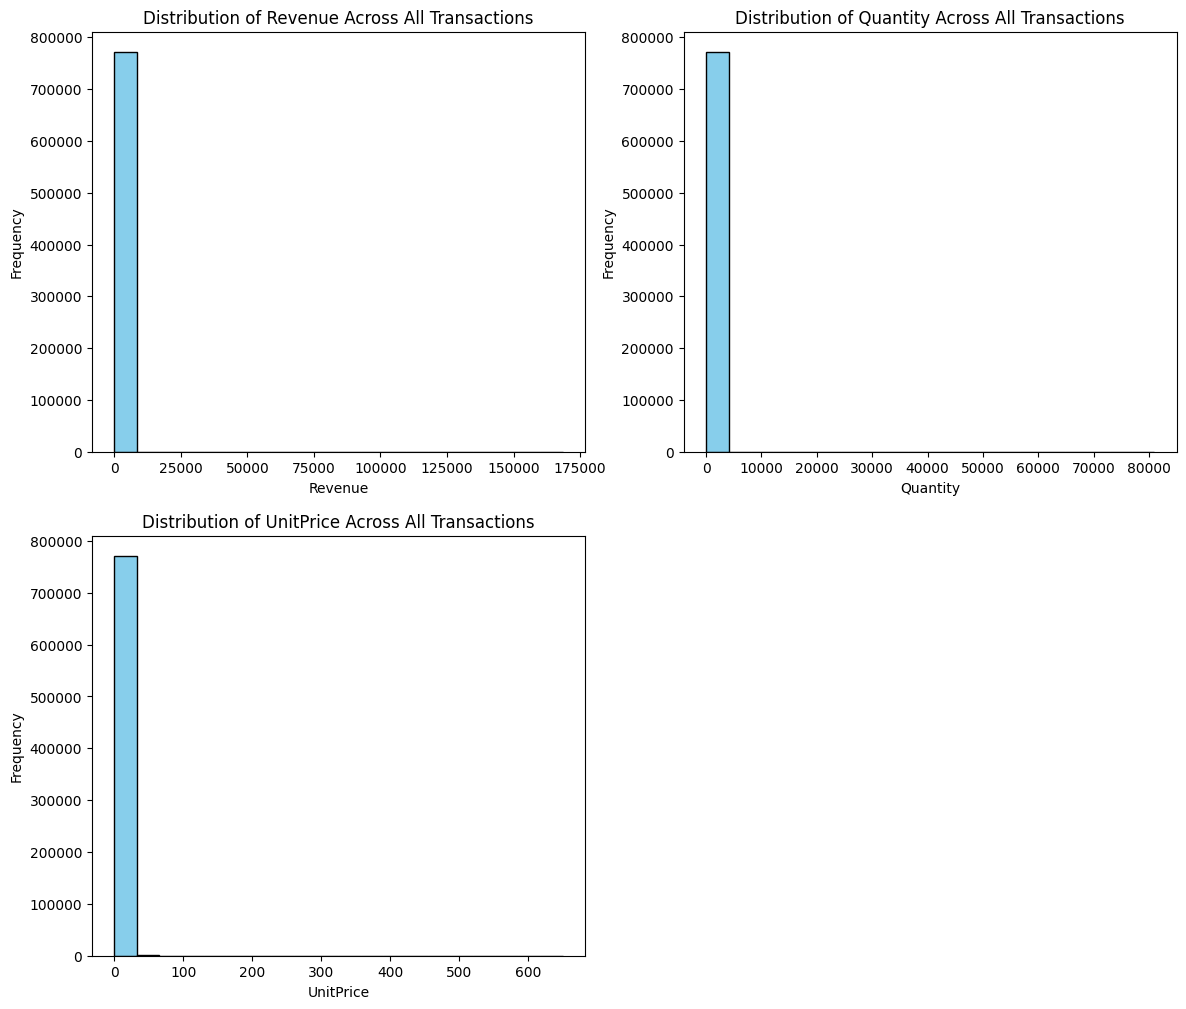

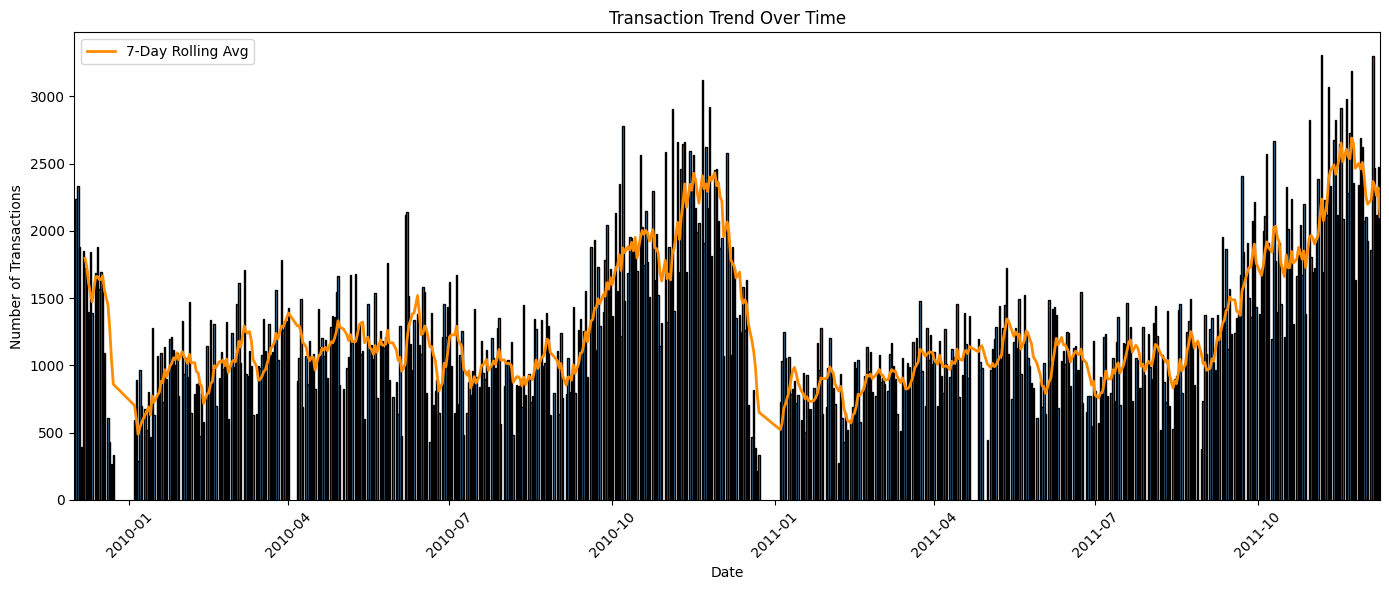

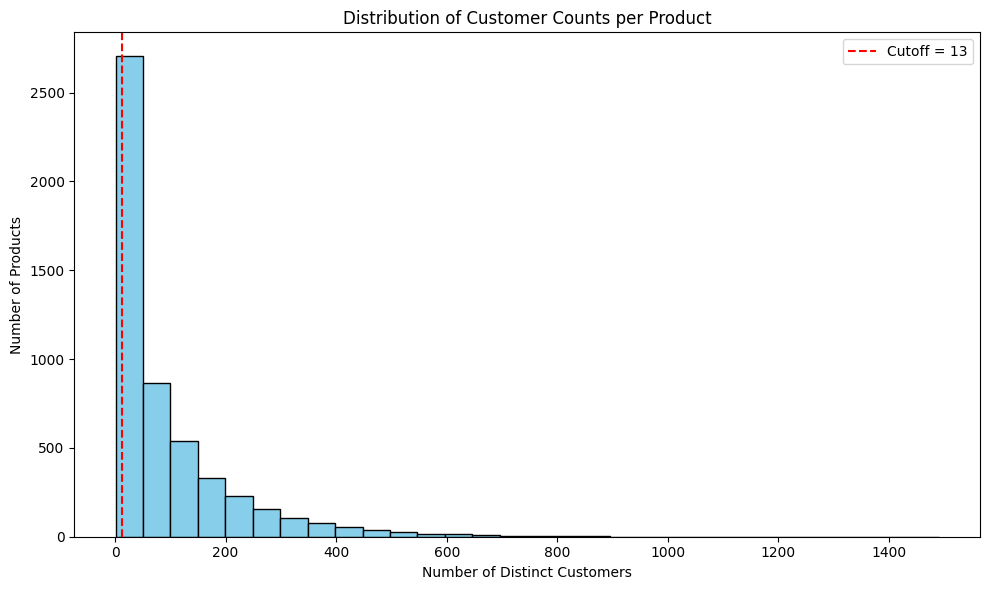

In [11]:
# ===================================================
# DISTRIBUTIONS: Understanding the Data at a Glance
# Explore distributions to spot patterns
# ===================================================

# Identify the Outliers
def segment_outliers(df, columns):
    outlier_summary = {}

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Segment outliers
        low_outliers = df[df[col] < lower_limit]
        high_outliers = df[df[col] > upper_limit]
        total_outliers = pd.concat([low_outliers, high_outliers])
        non_outliers = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

        # Add flag column to original df
        df[f'{col}_Outlier'] = df[col].apply(
            lambda x: 'Low' if x < lower_limit else 'High' if x > upper_limit else 'None'
        )

        # Store summary stats only
        outlier_summary[col] = {
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR,
            'Lower Limit': lower_limit,
            'Upper Limit': upper_limit,
            'Low Outlier Count': len(low_outliers),
            'High Outlier Count': len(high_outliers),
            'Total Outlier Count': len(total_outliers),
            'Non-Outlier Count': len(non_outliers)
        }

        # Print summary
        print(f"\n Outlier Summary for '{col}':")
        print(f"• Q1 (25th percentile): {Q1:.2f}")
        print(f"• Q3 (75th percentile): {Q3:.2f}")
        print(f"• IQR: {IQR:.2f}")
        print(f"• Lower Limit: {lower_limit:.2f}")
        print(f"• Upper Limit: {upper_limit:.2f}")
        print(f"• Low Outlier Count: {len(low_outliers)}")
        print(f"• High Outlier Count: {len(high_outliers)}")
        print(f"• Total Outlier Count: {len(total_outliers)}")
        print(f"• Non-Outlier Count: {len(non_outliers)}")

    return outlier_summary

# --- Apply to numeric columns ---
numeric_cols = ['Revenue','Quantity','UnitPrice']
outlier_results = segment_outliers(df, numeric_cols)

### Customer count per product cutoff point
# Step 1: Get distinct customer count per product
customer_counts = df.groupby('Description')['CustomerID'].nunique()

# Step 2: IQR calculation
Q1 = customer_counts.quantile(0.25)
Q3 = customer_counts.quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Step 3: Print summary
print("\n Outlier Summary for 'CustomerCount':")
print(f"• Q1 (25th percentile): {Q1:.2f}")
print(f"• Q3 (75th percentile): {Q3:.2f}")
print(f"• IQR: {IQR:.2f}")
print(f"• Lower Limit: {lower_limit:.2f}")
print(f"• Upper Limit: {upper_limit:.2f}")
print(f"• Products Below Cutoff: {(customer_counts < lower_limit).sum()}")
print(f"• Products Above Cutoff: {(customer_counts > upper_limit).sum()}")
print(f"• Total Products: {len(customer_counts)}")



# --- COLUMN GROUPING ---
numeric_cols = ['Revenue','Quantity','UnitPrice']

# --- PLOTTING DISTRIBUTIONS ---
total_plots = len(numeric_cols)
cols = 2
rows = (total_plots + 1) // cols

plt.figure(figsize=(14, 6*rows))

print("\n📊 Distribution charts")

# Numeric distributions (histograms)
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col} Across All Transactions')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# --- DATE DISTRIBUTION: Transactions per Day ---
# Step 1: Extract and sort daily transaction counts
daily_counts = df['InvoiceDate'].dt.date.value_counts().sort_index()

# Step 2: Define actual transaction date range
start_date = df['InvoiceDate'].min().date()
end_date = df['InvoiceDate'].max().date()

# Step 3: Plot daily transaction volume
plt.figure(figsize=(14, 6))
plt.bar(daily_counts.index, daily_counts.values, color='steelblue', edgecolor='black')
plt.title('Transaction Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.xlim(start_date, end_date)

# Step 4: Rolling average overlay
smoothed = daily_counts.rolling(window=7).mean()
plt.plot(smoothed.index, smoothed.values, color='darkorange', linewidth=2, label='7-Day Rolling Avg')
plt.legend()
plt.tight_layout()
plt.show()

# Customer counts per Product
plt.figure(figsize=(10, 6))
plt.hist(customer_counts, bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=13, color='red', linestyle='--', label='Cutoff = 13')
plt.title('Distribution of Customer Counts per Product')
plt.xlabel('Number of Distinct Customers')
plt.ylabel('Number of Products')
plt.legend()
plt.tight_layout()
plt.show()

## Distribution Insights at a Glance

This section gives a quick look at how transactions behave across **Revenue**, **Quantity**, **UnitPrice**, and **Customer Count per Product**, just enough to spot patterns before diving deeper in EDA.

The **IQR method** is used to flag unusually high values. In retail, these “outliers” often reflect real business behavior like **bulk orders or premium items** not necessarily errors. Still, it's worth staying alert to anomalies that may signal data entry issues or edge-case logic.

---

### 📈 Transaction Trend Over Time

Before diving into distributions, it helps to zoom out and look at the **daily transaction rhythm**.

- The chart shows **transaction volume per day**, with a **7-day rolling average** to smooth out noise  
- Clear **seasonal spikes** and **weekly cycles** emerge likely tied to promotions, holidays, or restocking behavior  
- Notably, both years show **consistent surges from October to December**, a classic retail pattern tied to holiday prep, gifting, and year-end inventory turnover  
- Periods of low activity may reflect **inventory gaps**, **system downtime**, or **off-season periods**

This trend view sets the stage for understanding **when** outliers happen not just how big they are. Deeper seasonal analysis happens in the EDA section.

---

### 💰 Revenue
- Most transactions earn **less than £42**
- **61,963 flagged as high outliers**  
- Indicates a **long tail of premium transactions**, likely driven by bulk orders or high-value items

### 📦 Quantity
- Most orders are **small (2–12 units)**  
- **50,866 transactions** exceed the typical range  
- Suggests **bulk buying or wholesale behavior**, especially from B2B clients or seasonal spikes

### 💰 UnitPrice
- Most items cost **under £4**  
- **62,895 transactions** involve higher-priced items  
- Reflects a **low-price catalog** with a few premium SKUs or bundled products

### 👥 Customer Count per Product

We apply the same IQR method used for revenue, quantity, and unit price to identify products bought by unusually few customers. In this case, the **25th percentile (Q1 = 13)** serves as a behavioral cutoff.

- Products with **fewer than 13 distinct customers** are flagged as **bulk-driven**

---

### 🧠 What This Means

- All three metrics are **right-skewed** lots of smaller values, few big ones  
- High outliers are **expected in retail**, especially around promotions, holidays, or B2B orders  
- The trend chart helps anchor these outliers in time, **when they happen matters just as much as how big they are**  
- This is just a glance, **deeper segmentation, seasonal mapping, and anomaly checks happen in the EDA section**

<a id="eda"></a>
## EDA

### Understanding Retail Data: A Supermarket Analogy

Retail datasets are deceptively simple at first glance but they’re layered, and how you analyze them depends entirely on your goal. It’s all about context.

Let’s break it down using a supermarket visit:

---

### 1. Invoice = One Shopping Session

Imagine walking into a supermarket, picking up a few items, and checking out. You receive **one receipt**, that’s your **invoice**.

- It represents **one order**  
- It has a unique Invoice Number. In this case,`Invoice`  
- It’s tied to a specific `CustomerID` and `InvoiceDate`

---

### 2. Transaction = One Line on the Receipt

Each line on that receipt is a **transaction** in the dataset:

- 2 packs of cereal → one transaction  
- 5 bottles of water → another transaction  
- 1 chocolate bar → another

So one invoice might contain **multiple transactions**, each with:
- A product
- Quantity   
- Total Amount to be paid by customer for all products

---

### 👤 Customer = The Shopper

Now imagine **Customer A** shops multiple times:
- On Monday, they buy 3 items → 1 invoice, 3 transactions  
- On Friday, they buy 10 items → 1 invoice, 10 transactions  
- Next month, they return again

So:
- One customer can have **many invoices**  
- Each invoice can have **many transactions**  
- Their total spend, frequency, and diversity vary over time

---

### Why This Matters

Depending on your analysis:
- For **loyalty**, group by `CustomerID`  
- For **order behavior**, group by `InvoiceNo`  
- For **product diagnostics**, stay at the transaction level

And here’s a key distinction:

> **While transaction count reflects how many times a customer appears in the dataset, unique items bought reveals how diverse their shopping behavior is. High transaction count may indicate bulk or repeat purchases, while high product diversity signals curiosity and cross-category engagement.**

We’ll dive deeper into each of these layers in the next sections.

In [12]:
# ===================================================
# EDA Step 1: Dataset-Level KPIs
# ===================================================
print("\n EDA Step 1: Dataset-Level KPIs")

# 👥 Who’s Buying
# Understand the customer base and geographic spread
total_customers = df['CustomerID'].nunique()  # Unique customers
total_countries = df['Country'].nunique()     # Unique countries

avg_transactions_per_customer = df.groupby('CustomerID').size().mean()         # Avg product lines per customer
avg_quantity_per_customer = df.groupby('CustomerID')['Quantity'].sum().mean()  # Avg units per customer
avg_revenue_per_customer = df.groupby('CustomerID')['Revenue'].sum().mean()    # Avg spend per customer

# 🗓️ When They’re Buying
# Extract date range and daily rhythm
min_date = df['InvoiceDate'].min()                              # Earliest transaction date
max_date = df['InvoiceDate'].max()                              # Latest transaction date
number_of_days = df['InvoiceDate'].dt.date.nunique()            # Unique calendar days
total_transactions = len(df)                                    # Each row = one product on one invoice
avg_transactions_per_day = total_transactions / number_of_days  # Avg daily transaction volume

# 💰 How Much They’re Spending
# Surface total and average revenue
total_revenue = df['Revenue'].sum()     # Total revenue
avg_unit_price = df['Revenue'].sum() / df['Quantity'].sum()  # Avg price per item
min_unitprice = df['UnitPrice'].min()   # Lowest unit price
max_unitprice = df['UnitPrice'].max()   # Highest unit price

# 🧾 How Often & How Much per Order
# Analyze invoice-level behavior
total_invoices = df['Invoice'].nunique()                                   # Unique invoices
avg_transactions_per_invoice = df.groupby('Invoice').size().mean()         # Avg product lines per invoice
avg_order_value = df.groupby('Invoice')['Revenue'].sum().mean()    # Avg order value
avg_quantity_per_invoice = df.groupby('Invoice')['Quantity'].sum().mean()  # Avg units per invoice

# 📦 What They’re Buying
# Understand product diversity and quantity dynamics
total_unique_items = df['Description'].nunique()  # Unique products sold
total_quantity = df['Quantity'].sum()             # Total units sold
avg_quantity = df['Quantity'].mean()              # Avg units per transaction
min_quantity = df['Quantity'].min()               # Smallest quantity sold
max_quantity = df['Quantity'].max()               # Largest quantity sold


# ===================================================
# Display KPIs
# ==================================================
print("\n Dataset level KPIs Table")
kpi_data = {
    "Metric": [
        "Total Customers",
        "Total Countries",
        "Transactions Span",
        "Average Transactions per Day",
        "Total Revenue",
        "Average Revenue per Customer (ARPC)",
        "Average Order Value (AOV)",
        "Total Transactions",
        "Total Invoices",
        "Average Transactions per Invoice",
        "Total Unique Items Purchased",
        "Total Quantity Sold",
        "Quantity Range",
        "Average Quantity per Transaction",
        "Average Quantity per Invoice",
        "Average Quantity per Customer",
        "Average Transactions per Customer",
        "Average Unit Price",
        "Unit Price Range"
    ],
    "Value": [
        total_customers,
        total_countries,
        f"{min_date.date()} to {max_date.date()}",
        round(avg_transactions_per_day, 2),
        f"£{total_revenue:,.2f}",
        f"£{avg_revenue_per_customer:,.2f}",
        f"£{avg_order_value:,.2f}",
        total_transactions,
        total_invoices,
        round(avg_transactions_per_invoice, 2),
        total_unique_items,
        total_quantity,
        f"{min_quantity} - {max_quantity}",
        round(avg_quantity, 2),
        round(avg_quantity_per_invoice, 2),
        round(avg_quantity_per_customer, 2),
        round(avg_transactions_per_customer, 2),
        f"£{avg_unit_price:.2f}",
        f"£{min_unitprice} - £{max_unitprice}"
    ]
}

kpi_df = pd.DataFrame(kpi_data)

display(kpi_df)


 EDA Step 1: Dataset-Level KPIs

 Dataset level KPIs Table


,Metric,Value
0,Total Customers,5852
1,Total Countries,41
2,Transactions Span,2009-12-01 to 2011-12-09
3,Average Transactions per Day,1278.67
4,Total Revenue,"£16,994,197.13"
5,Average Revenue per Customer (ARPC),"£2,904.00"
6,Average Order Value (AOV),£464.55
7,Total Transactions,772318
8,Total Invoices,36582
9,Average Transactions per Invoice,21.11



 EDA Step 2: CUSTOMER BEHAVIOUR


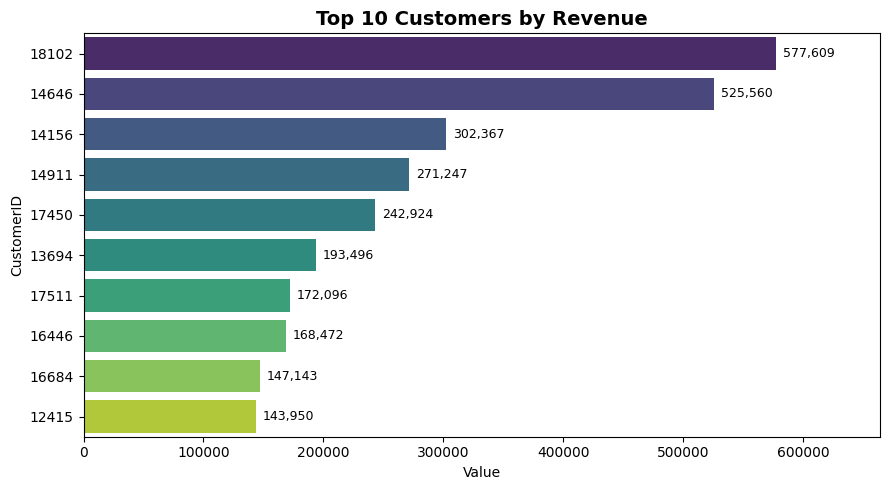

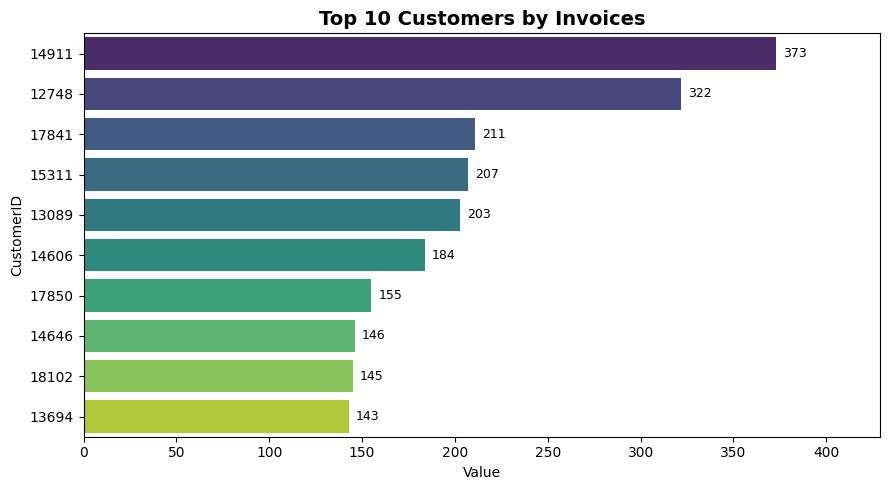

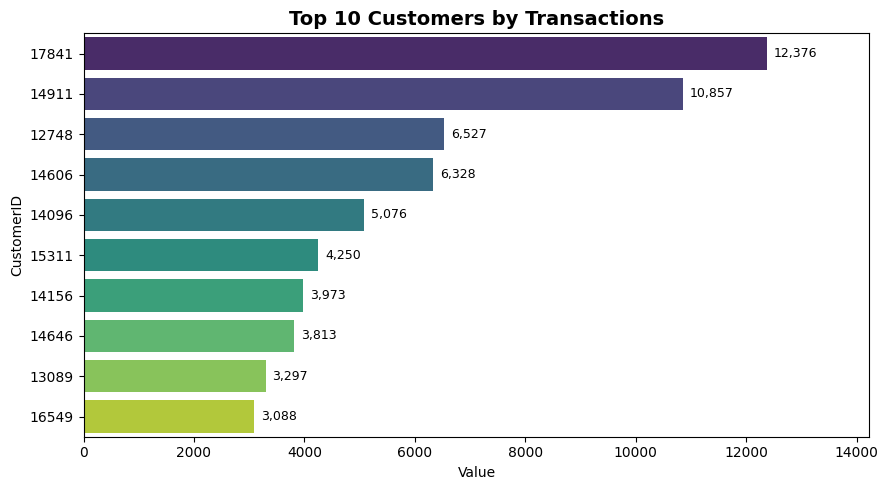

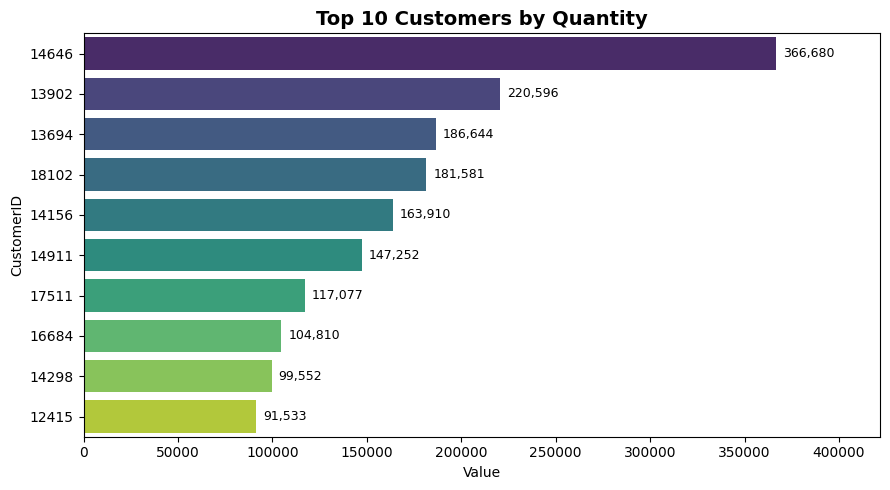

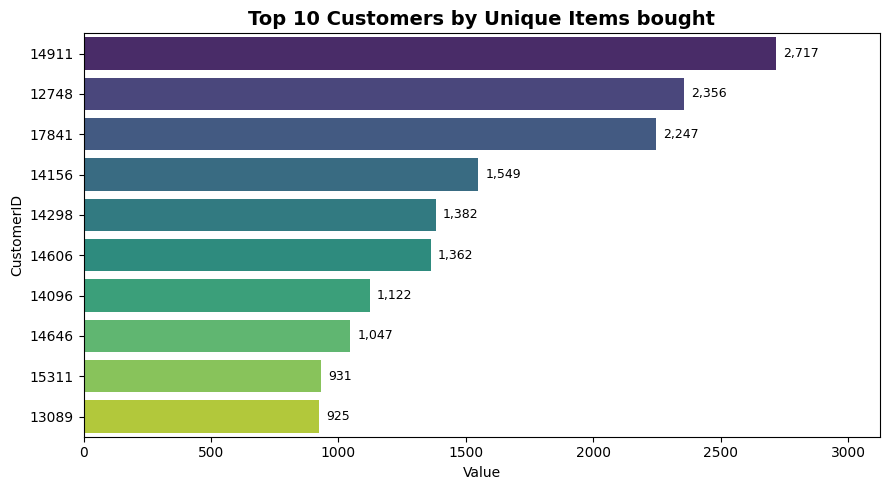

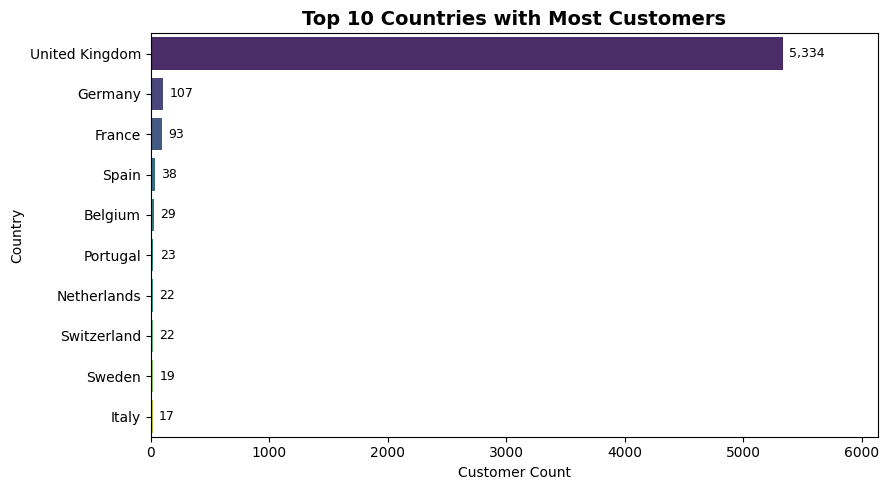

In [13]:
# ===================================================
# EDA Step 2: Customer Behaviour
# ===================================================

print("\n EDA Step 2: CUSTOMER BEHAVIOUR")

def top_10_customer_metrics(df):
    customer_group = df.groupby('CustomerID')

    top_revenue = customer_group['Revenue'].sum().sort_values(ascending=False).head(10)
    top_invoices = customer_group['Invoice'].nunique().sort_values(ascending=False).head(10)
    top_transactions = customer_group.size().sort_values(ascending=False).head(10)
    top_quantity = customer_group['Quantity'].sum().sort_values(ascending=False).head(10)
    top_unique_items = customer_group['Description'].nunique().sort_values(ascending=False).head(10)
    top_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head(10)

    return {
        'Top 10 Customers by Revenue': top_revenue,
        'Top 10 Customers by Invoices': top_invoices,
        'Top 10 Customers by Transactions': top_transactions,
        'Top 10 Customers by Quantity': top_quantity,
        'Top 10 Customers by Unique Items bought': top_unique_items,
        'Top 10 Countries with Most Customers': top_country
    }

metrics = top_10_customer_metrics(df)

# Plot visual
for title, data in metrics.items():
    sorted_data = data.sort_values(ascending=False)
    df_plot = sorted_data.reset_index()

    if title == 'Top 10 Countries with Most Customers':
        y_label = 'Country'
        x_label = 'Customer Count'
    else:
        y_label = 'CustomerID'
        x_label = 'Value'

    plt.figure(figsize=(9, 5))
    ax = sns.barplot(x=sorted_data.values, y=df_plot[y_label], palette='viridis')

    # Calculate max value for padding
    max_val = sorted_data.values.max()
    ax.set_xlim(0, max_val * 1.15)  # Add 15% padding to the right

    # Add value labels
    for i, (value, label) in enumerate(zip(sorted_data.values, df_plot[y_label])):
        ax.text(value + max_val * 0.01, i, f'{value:,.0f}', va='center', fontsize=9)

    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.show()


 EDA Step 3: SEASONAL PATTERNS

 EDA Step 3.1: YEARLY COMPARISON


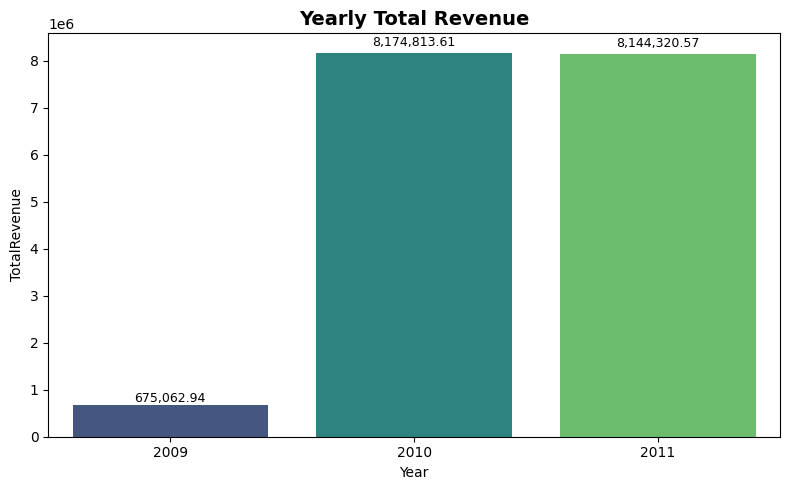

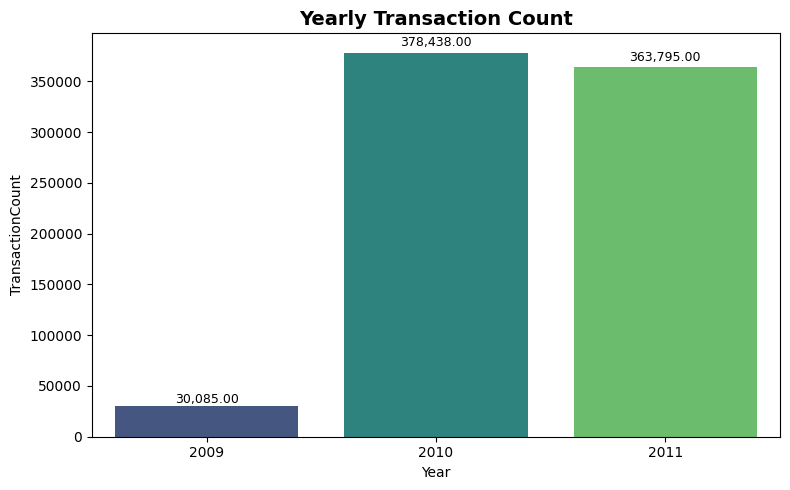

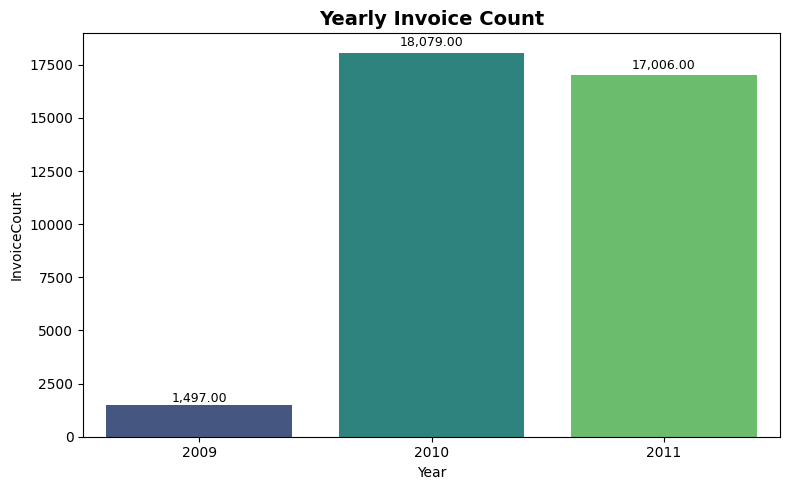

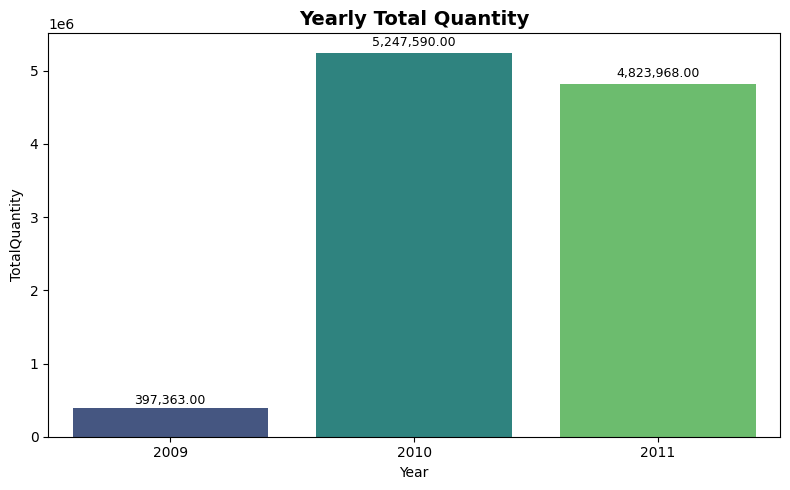

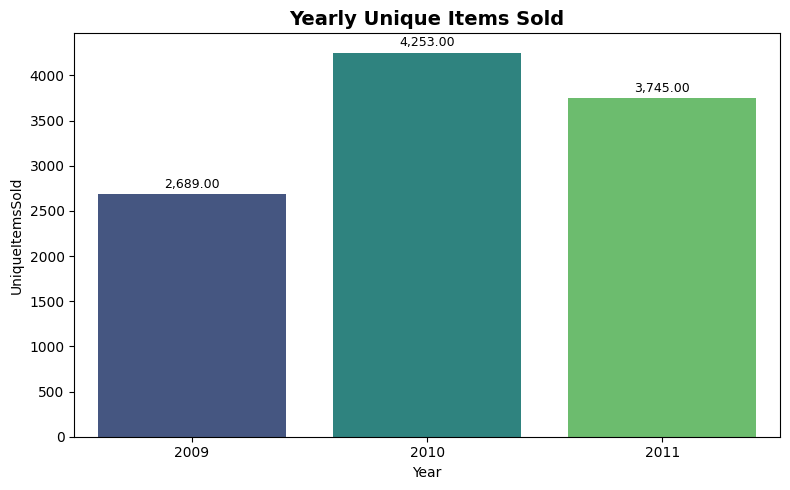

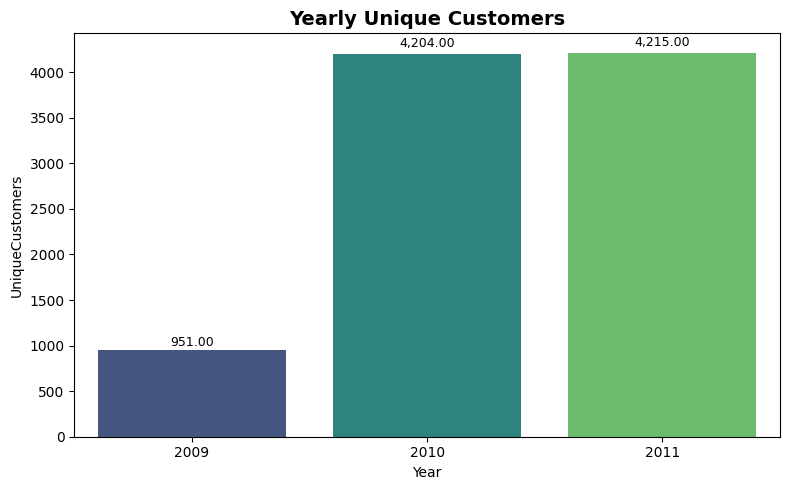

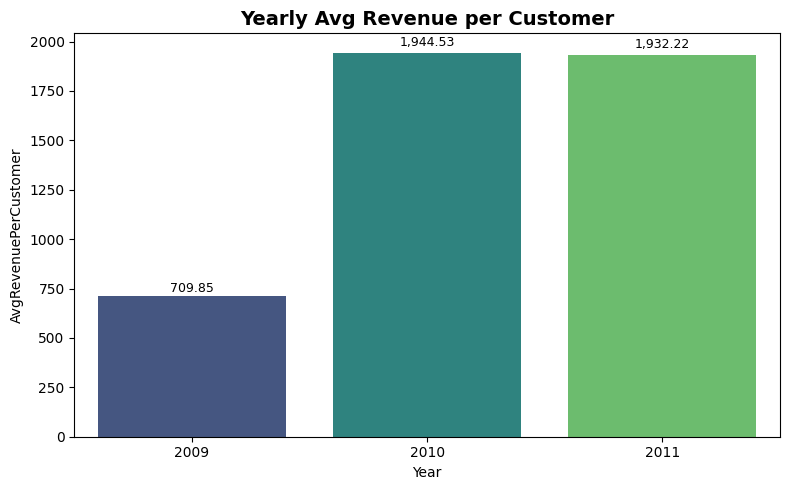

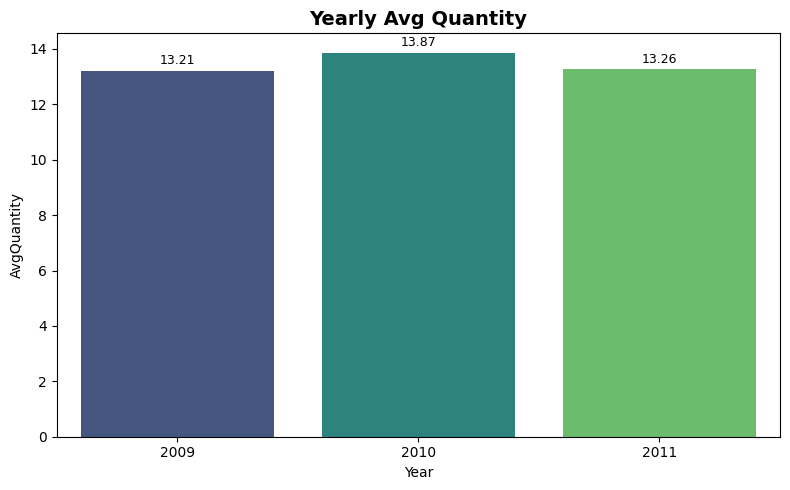

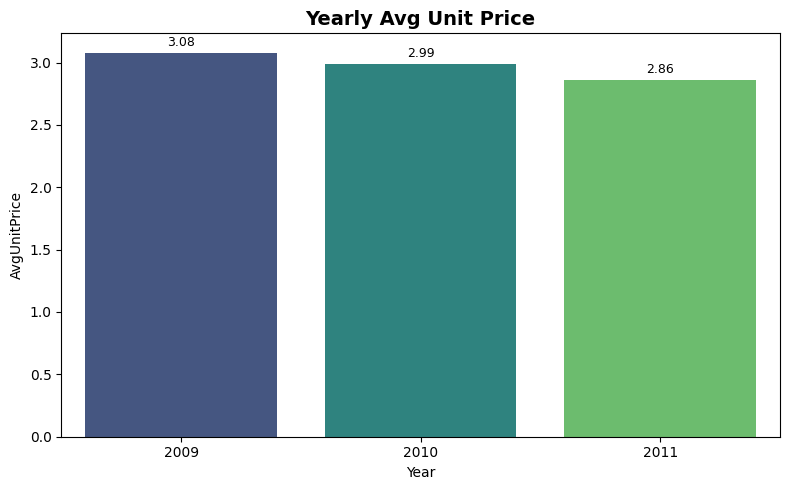

In [14]:
# ===================================================
# EDA Step 3: Seasonal Patterns
# ===================================================
print("\n EDA Step 3: SEASONAL PATTERNS")

# Extract time components
df['Year']       = df['InvoiceDate'].dt.year
df['Month']      = df['InvoiceDate'].dt.month
df['Day']        = df['InvoiceDate'].dt.day
df['MonthYear']  = df['InvoiceDate'].dt.to_period('M').astype(str)
df['DayName']    = df['InvoiceDate'].dt.day_name()
df['IsWeekend']  = df['DayName'].isin(['Saturday', 'Sunday'])
df['Hour']       = df['InvoiceDate'].dt.hour
# Create hour bins (e.g. 6–7 PM → bin = '18:00–19:00')
df['HourBin'] = pd.cut(
    df['Hour'],
    bins=list(range(0, 25)),  # 0 to 24
    right=False,
    labels=[f'{h:02d}:00–{h+1:02d}:00' for h in range(0, 24)]
)

# ===================================================
# Step 1: Yearly Comparison
# ===================================================

print("\n EDA Step 3.1: YEARLY COMPARISON")

# Aggregate yearly metrics
yearly_summary = df.groupby('Year').agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'InvoiceDate': 'count',
    'Quantity': ['sum', 'mean'],
    'Description': 'nunique',
    'CustomerID': 'nunique',
    'UnitPrice': ['mean']
}).reset_index()

# Flatten columns
yearly_summary.columns = ['Year', 'TotalRevenue', 'InvoiceCount', 'TransactionCount',
                          'TotalQuantity', 'AvgQuantity',
                          'UniqueItemsSold', 'UniqueCustomers', 'AvgUnitPrice']

# Derived metrics
yearly_summary['AvgRevenuePerCustomer'] = yearly_summary['TotalRevenue'] / yearly_summary['UniqueCustomers']
yearly_summary['AvgRevenuePerCustomer'] = yearly_summary['AvgRevenuePerCustomer'].round(2)
yearly_summary['AvgQuantity'] = yearly_summary['AvgQuantity'].round(2)
yearly_summary['AvgUnitPrice'] = yearly_summary['AvgUnitPrice'].round(2)
yearly_summary['Year'] = yearly_summary['Year'].astype(str)


# Plot visual
titles = [
    'Yearly Total Revenue',
    'Yearly Transaction Count',
    'Yearly Invoice Count',
    'Yearly Total Quantity',
    'Yearly Unique Items Sold',
    'Yearly Unique Customers',
    'Yearly Avg Revenue per Customer',
    'Yearly Avg Quantity',
    'Yearly Avg Unit Price'
]

metrics = ['TotalRevenue', 'TransactionCount', 'InvoiceCount', 'TotalQuantity',
           'UniqueItemsSold', 'UniqueCustomers', 'AvgRevenuePerCustomer',
           'AvgQuantity', 'AvgUnitPrice']

for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x='Year', y=metric, data=yearly_summary, palette='viridis')

    # Add value labels on bars
    for index, row in yearly_summary.iterrows():
        ax.text(index, row[metric] + row[metric]*0.01, f'{row[metric]:,.2f}', 
                ha='center', va='bottom', fontsize=9)

    plt.title(titles[i], fontsize=14, weight='bold')
    plt.xlabel('Year')
    plt.ylabel(metric.replace('_', ' '))
    plt.tight_layout()
    plt.show()


 EDA Step 3.2: MONTHLY COMPARISON


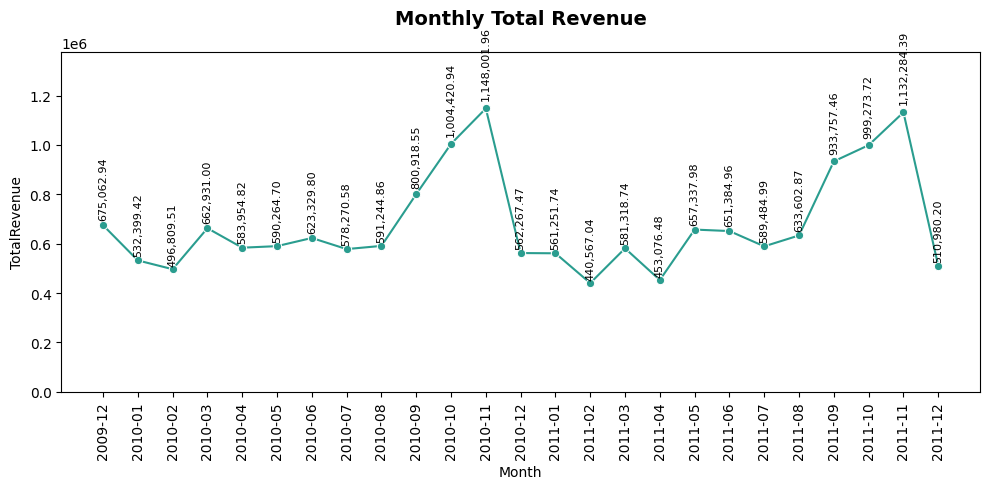

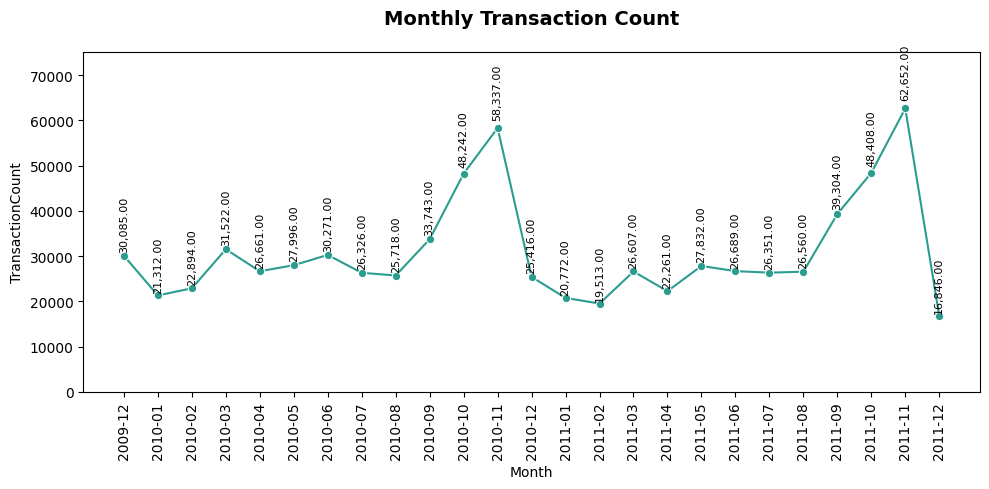

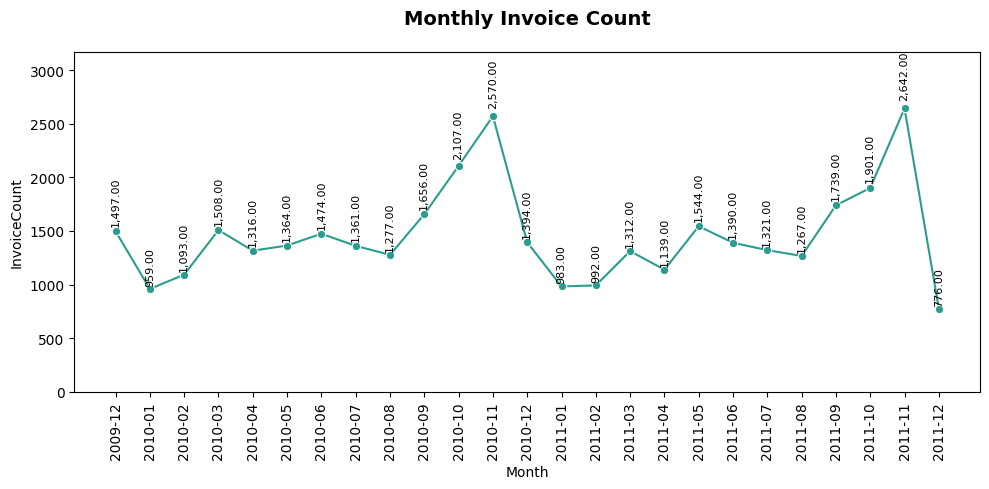

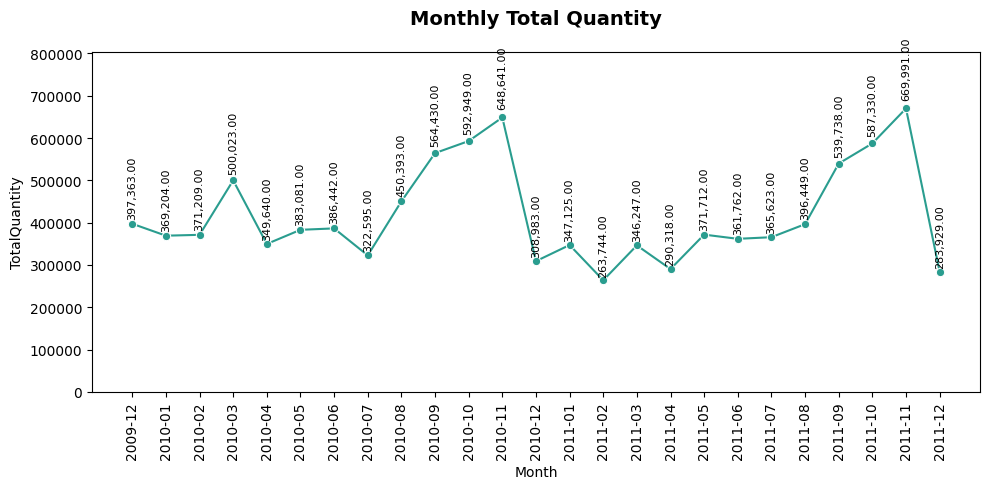

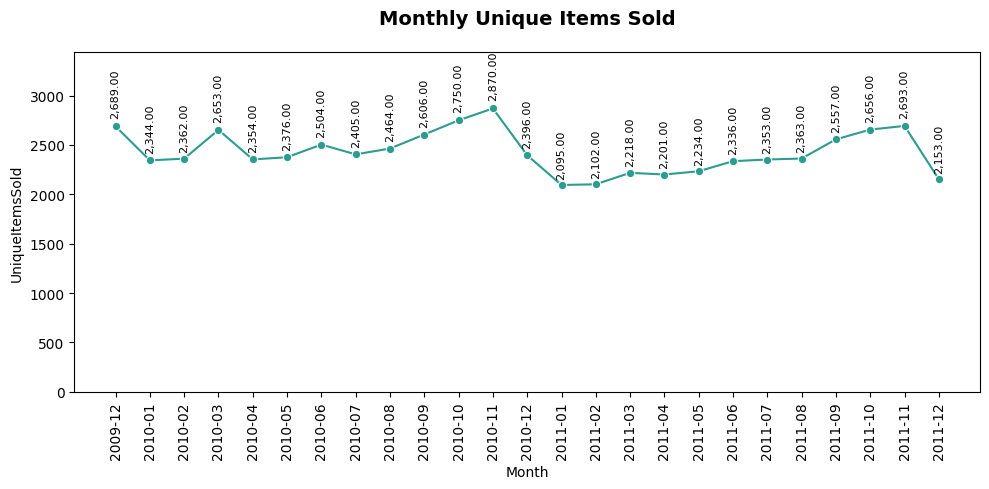

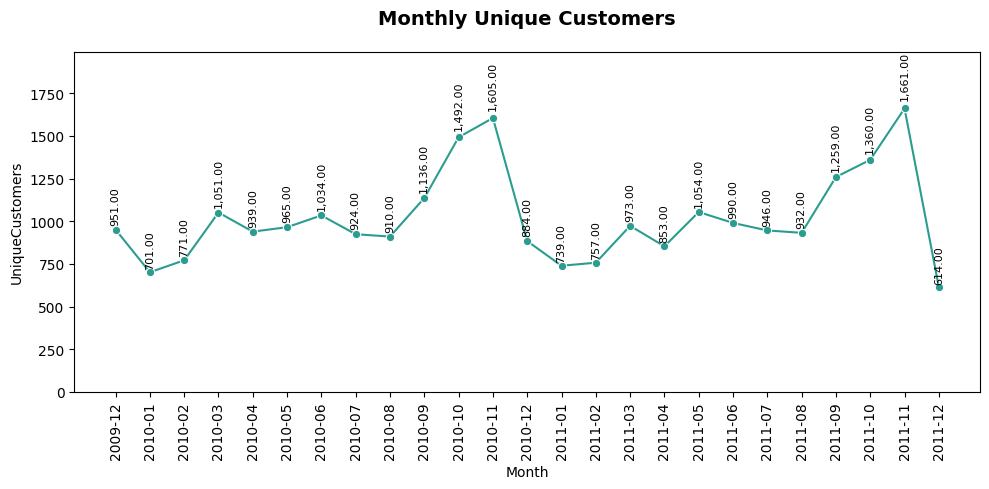

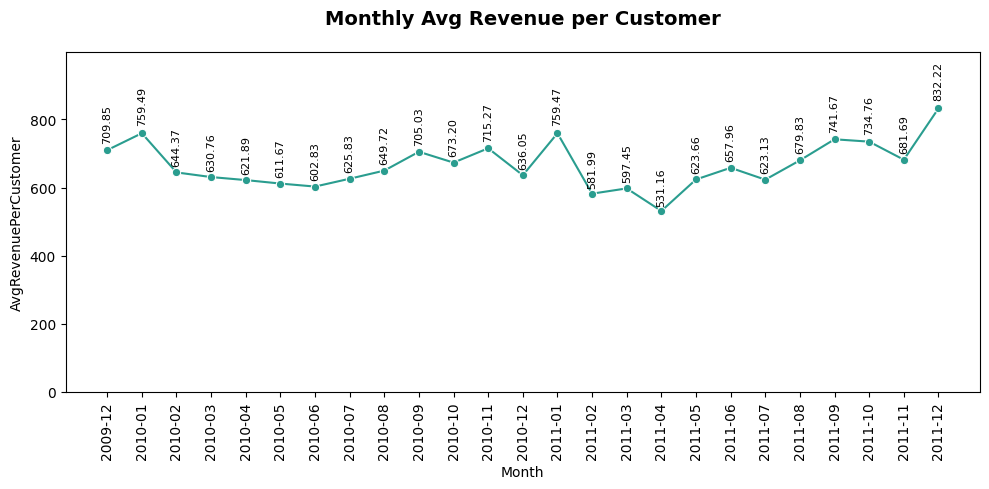

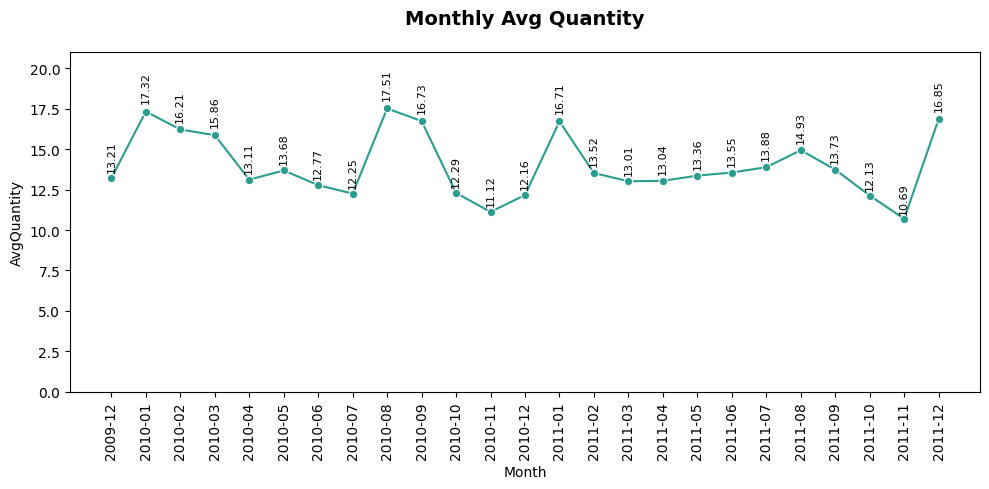

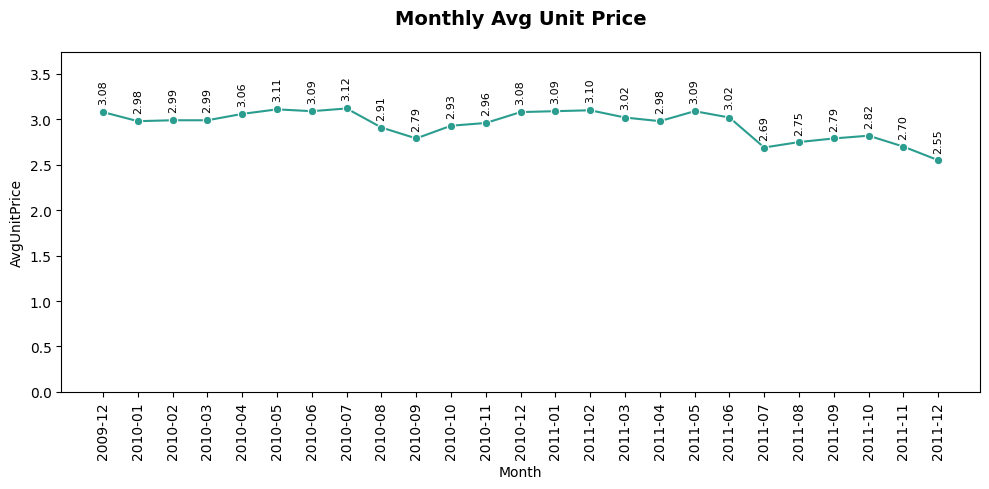

In [15]:
# ===================================================
# Step 2: Monthly Comparison
# ===================================================

print("\n EDA Step 3.2: MONTHLY COMPARISON")

# Aggregate monthly metrics
monthly_summary = df.groupby('MonthYear').agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'InvoiceDate': 'count',
    'Quantity': ['sum', 'mean'],
    'Description': 'nunique',
    'CustomerID': 'nunique',
    'UnitPrice': ['mean']
}).reset_index()

# Flatten columns
monthly_summary.columns = ['MonthYear', 'TotalRevenue', 'InvoiceCount', 'TransactionCount',
                           'TotalQuantity', 'AvgQuantity',
                           'UniqueItemsSold', 'UniqueCustomers', 'AvgUnitPrice']

# Derived metrics
monthly_summary['AvgRevenuePerCustomer'] = monthly_summary['TotalRevenue'] / monthly_summary['UniqueCustomers']
monthly_summary['AvgRevenuePerCustomer'] = monthly_summary['AvgRevenuePerCustomer'].round(2)
monthly_summary['AvgQuantity'] = monthly_summary['AvgQuantity'].round(2)
monthly_summary['AvgUnitPrice'] = monthly_summary['AvgUnitPrice'].round(2)

# Plot visual
titles = [
    'Monthly Total Revenue',
    'Monthly Transaction Count',
    'Monthly Invoice Count',
    'Monthly Total Quantity',
    'Monthly Unique Items Sold',
    'Monthly Unique Customers',
    'Monthly Avg Revenue per Customer',
    'Monthly Avg Quantity',
    'Monthly Avg Unit Price'
]

metrics = ['TotalRevenue', 'TransactionCount', 'InvoiceCount', 'TotalQuantity',
           'UniqueItemsSold', 'UniqueCustomers', 'AvgRevenuePerCustomer',
           'AvgQuantity', 'AvgUnitPrice']

# Ensure MonthYear is sorted chronologically
monthly_summary['MonthYear'] = pd.to_datetime(monthly_summary['MonthYear'])
monthly_summary = monthly_summary.sort_values('MonthYear')
monthly_summary['MonthYearStr'] = monthly_summary['MonthYear'].dt.strftime('%Y-%m')

for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 5))
    ax = sns.lineplot(x='MonthYearStr', y=metric, data=monthly_summary, marker='o', color='#2a9d8f')

    # Add vertical value labels with spacing
    for x, y in zip(monthly_summary['MonthYearStr'], monthly_summary[metric]):
        ax.text(x, y + y*0.03, f'{y:,.2f}', ha='center', va='bottom', fontsize=8, rotation=90)

    plt.title(titles[i], fontsize=14, weight='bold', pad=20)
    plt.xlabel('Month')
    plt.ylabel(metric.replace('_', ' '))
    plt.xticks(rotation=90)
    ax.set_ylim(0, monthly_summary[metric].max() * 1.2)  # Add vertical padding
    plt.tight_layout()
    plt.show()


 EDA Step 3.3: WEEKEND VS WEEKDAY (BY YEAR)


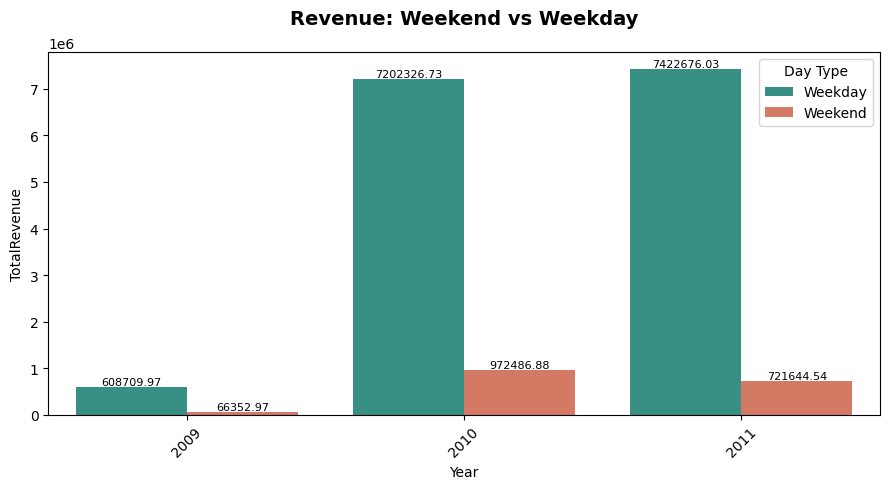

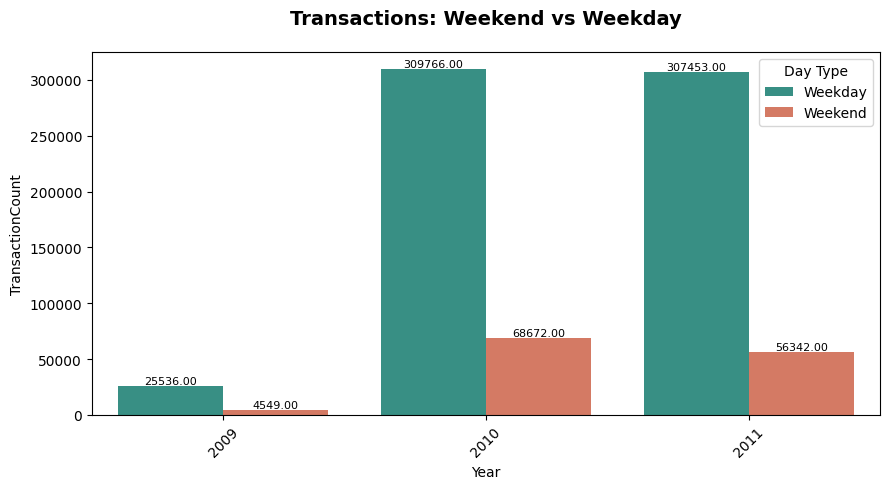

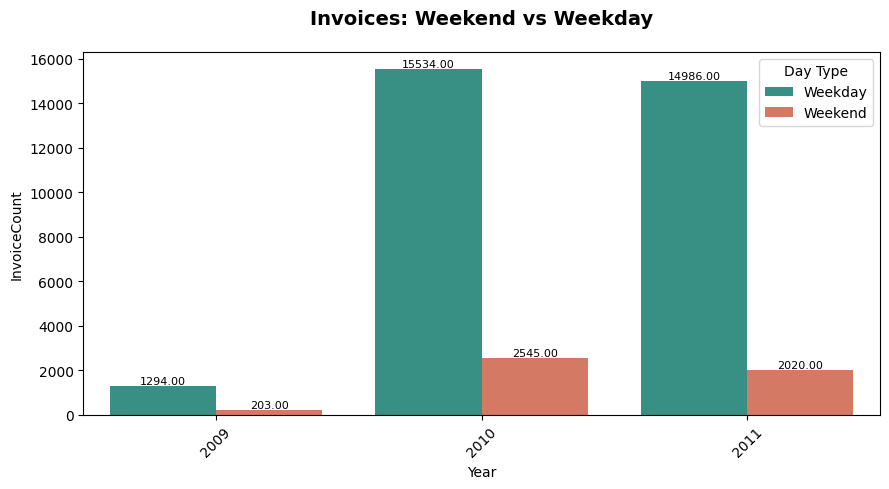

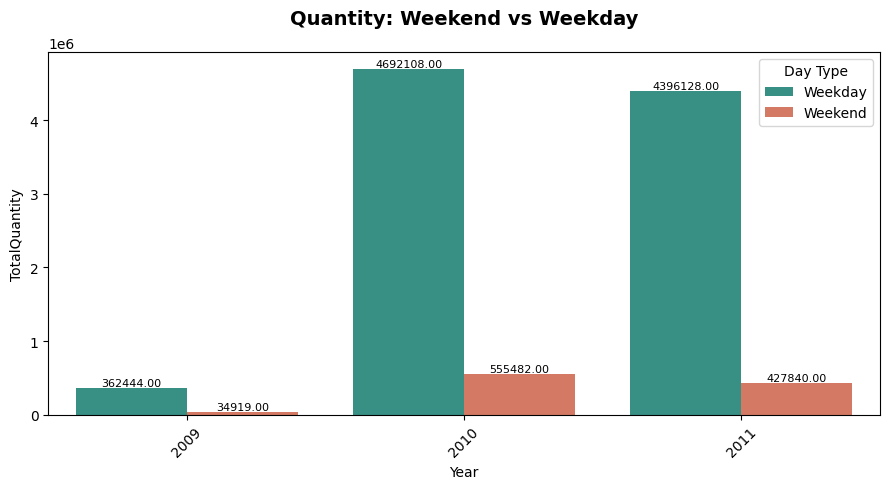

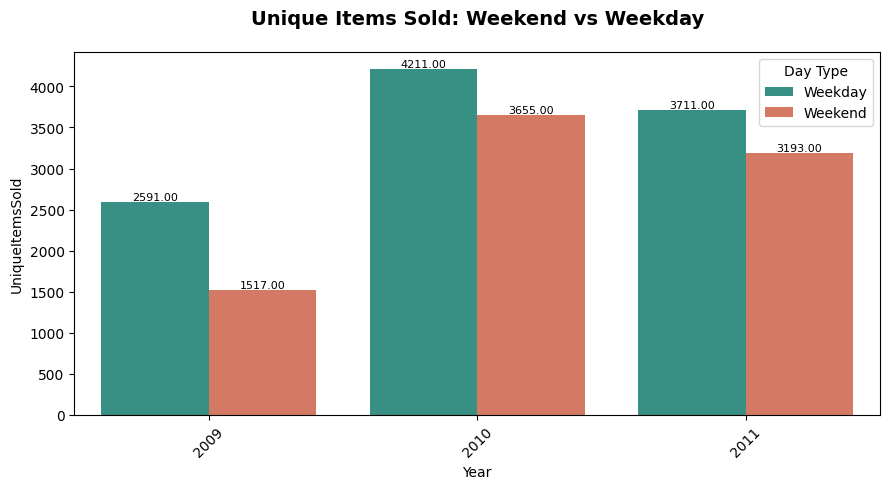

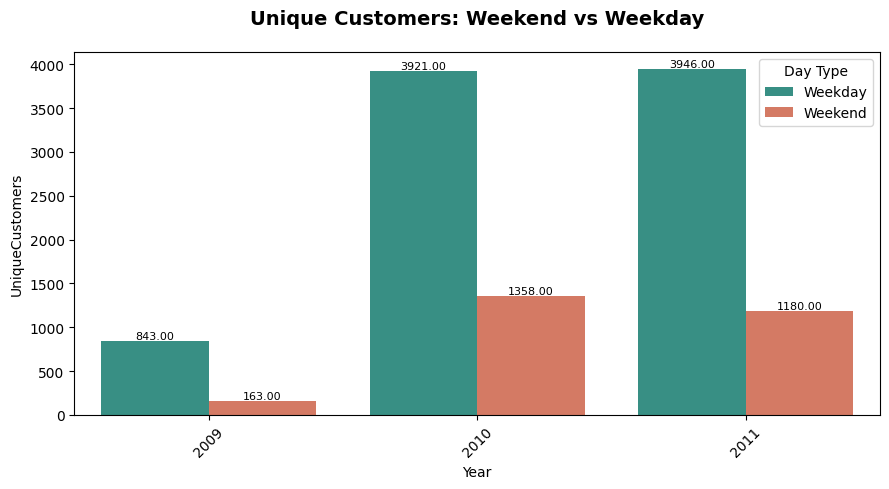

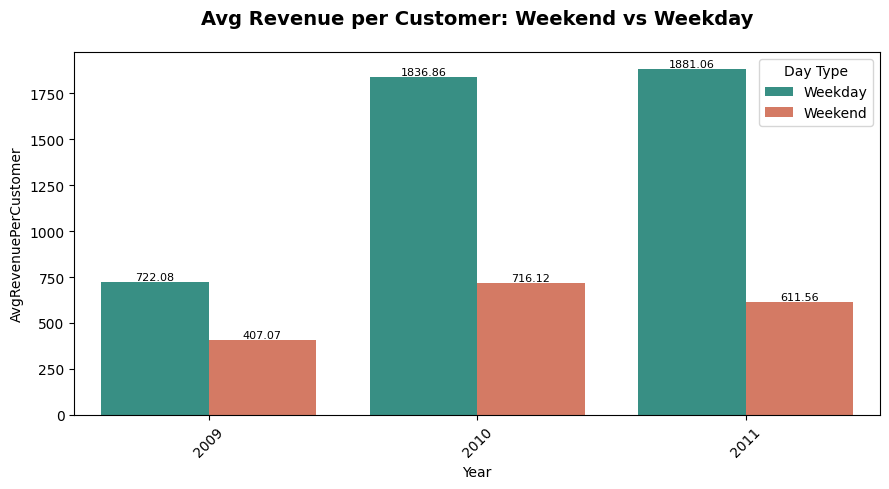

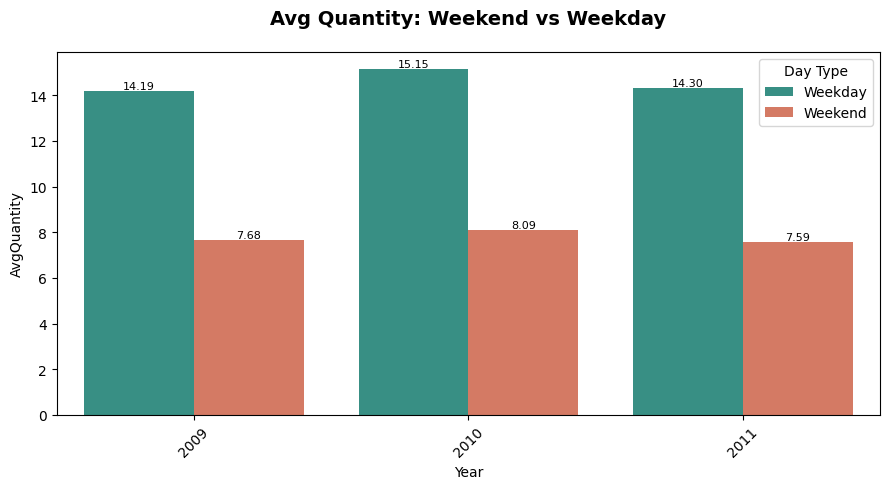

In [16]:
# ===================================================
# Step 3: Weekday vs Weekend (by Year)
# ===================================================

print("\n EDA Step 3.3: WEEKEND VS WEEKDAY (BY YEAR)")

# Aggregate by Year + IsWeekend
weekend_summary = df.groupby(['Year', 'IsWeekend']).agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'InvoiceDate': 'count',
    'Quantity': ['sum', 'mean'],
    'Description': 'nunique',
    'CustomerID': 'nunique'
}).reset_index()

# Flatten columns
weekend_summary.columns = ['Year', 'IsWeekend', 'TotalRevenue', 'InvoiceCount', 'TransactionCount',
                           'TotalQuantity', 'AvgQuantity',
                           'UniqueItemsSold', 'UniqueCustomers']

# Derived metrics
weekend_summary['AvgRevenuePerCustomer'] = weekend_summary['TotalRevenue'] / weekend_summary['UniqueCustomers']
weekend_summary['AvgRevenuePerCustomer'] = weekend_summary['AvgRevenuePerCustomer'].round(2)
weekend_summary['AvgQuantity'] = weekend_summary['AvgQuantity'].round(2)

# Label weekend status
weekend_summary['DayType'] = weekend_summary['IsWeekend'].map({True: 'Weekend', False: 'Weekday'})

# Ensure Year is sorted and categorical
weekend_summary['Year'] = weekend_summary['Year'].astype(str)
weekend_summary['DayType'] = pd.Categorical(weekend_summary['DayType'], categories=['Weekday', 'Weekend'])


# Plot visual
titles = [
    'Revenue: Weekend vs Weekday',
    'Transactions: Weekend vs Weekday',
    'Invoices: Weekend vs Weekday',
    'Quantity: Weekend vs Weekday',
    'Unique Items Sold: Weekend vs Weekday',
    'Unique Customers: Weekend vs Weekday',
    'Avg Revenue per Customer: Weekend vs Weekday',
    'Avg Quantity: Weekend vs Weekday'
]

metrics = ['TotalRevenue', 'TransactionCount', 'InvoiceCount', 'TotalQuantity',
           'UniqueItemsSold', 'UniqueCustomers', 'AvgRevenuePerCustomer',
           'AvgQuantity']


for i, metric in enumerate(metrics):
    plt.figure(figsize=(9, 5))
    ax = sns.barplot(data=weekend_summary, x='Year', y=metric, hue='DayType',
                     palette={'Weekday': '#2a9d8f', 'Weekend': '#e76f51'})

    # Add value labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8)

    plt.title(titles[i], fontsize=14, weight='bold', pad=20)
    plt.xlabel('Year')
    plt.ylabel(metric.replace('_', ' '))
    plt.xticks(rotation=45)
    plt.legend(title='Day Type', loc='upper right')
    plt.tight_layout()
    plt.show()


 EDA Step 3.4: DAY OF THE WEEK COMPARISON (BY YEAR)


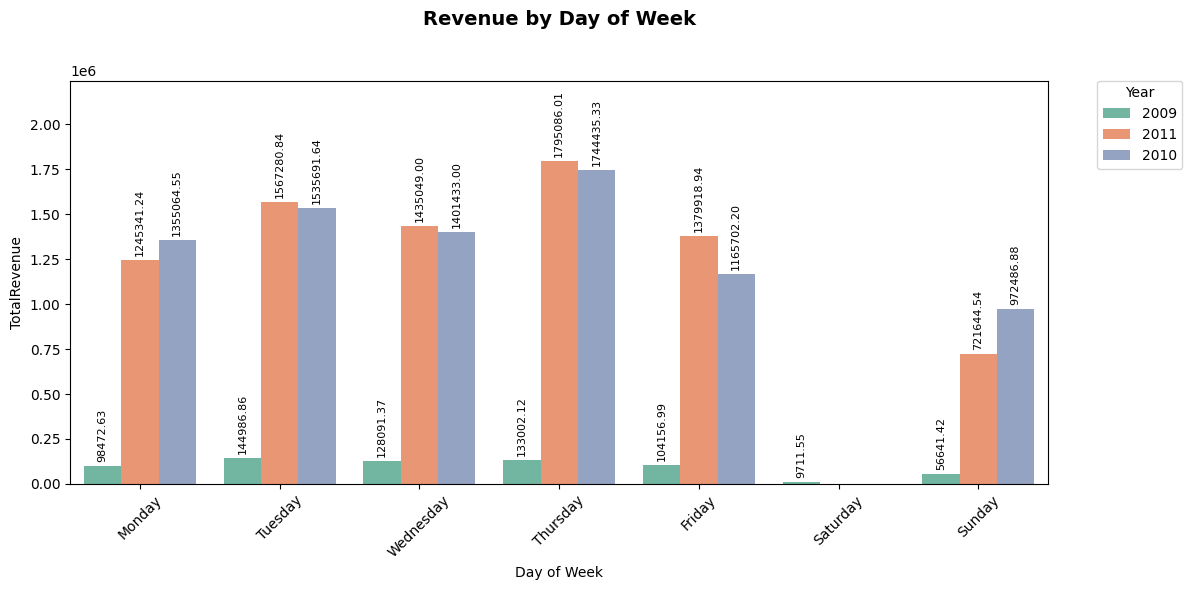

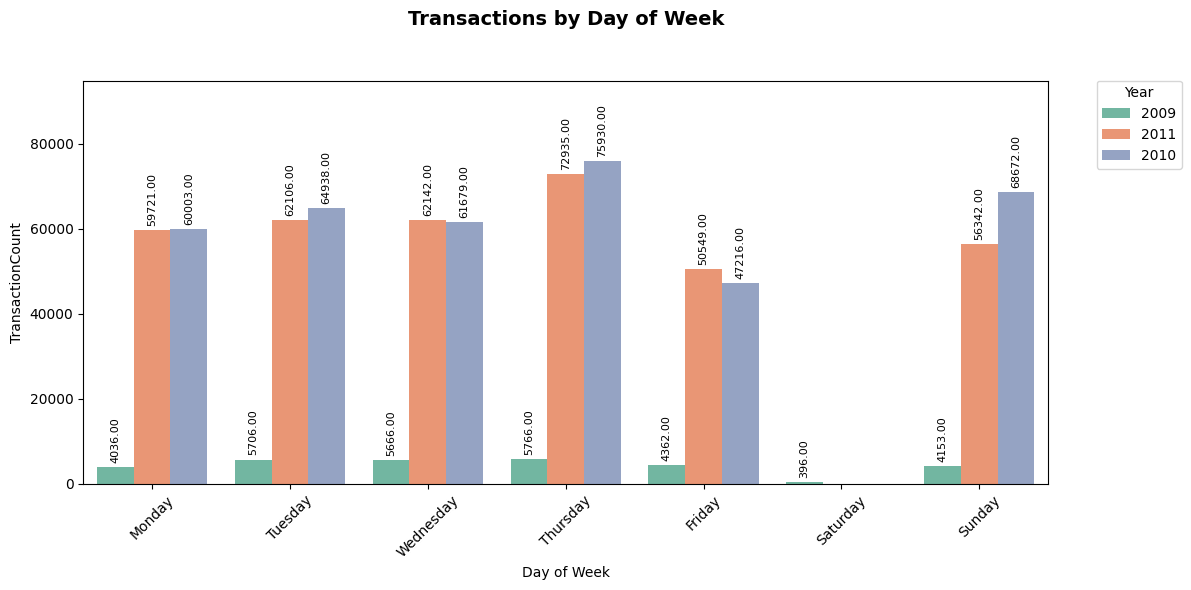

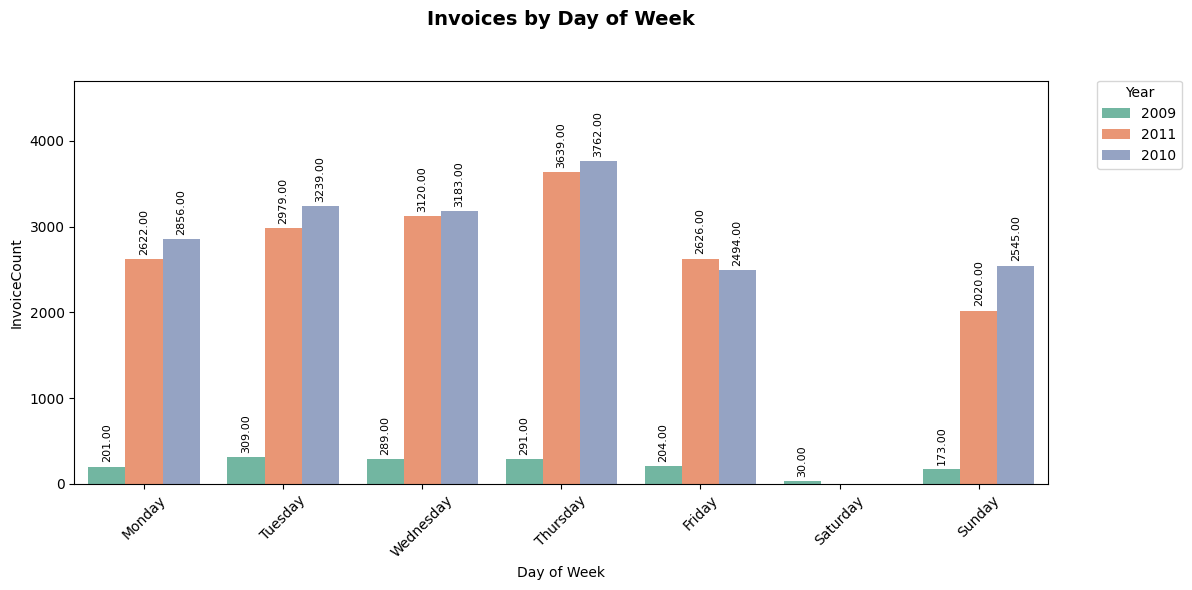

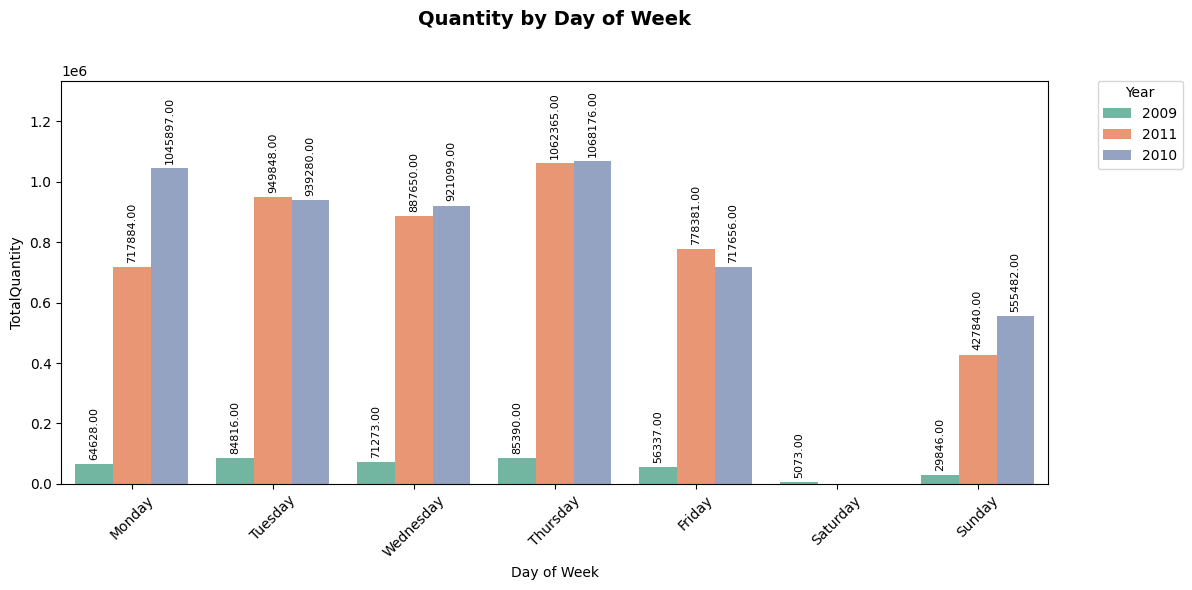

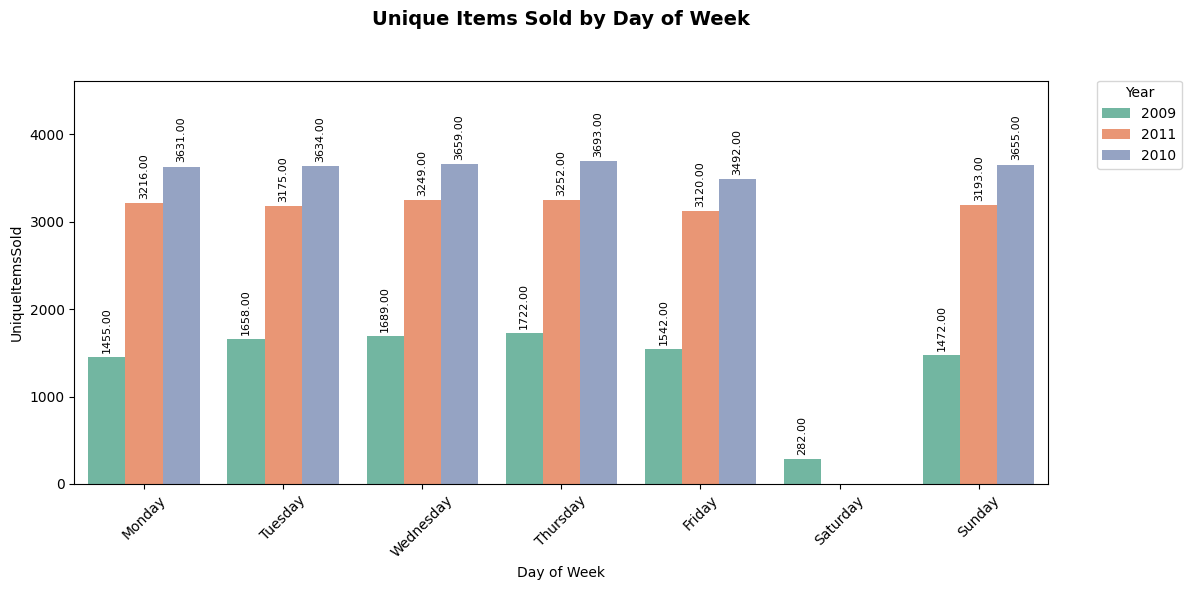

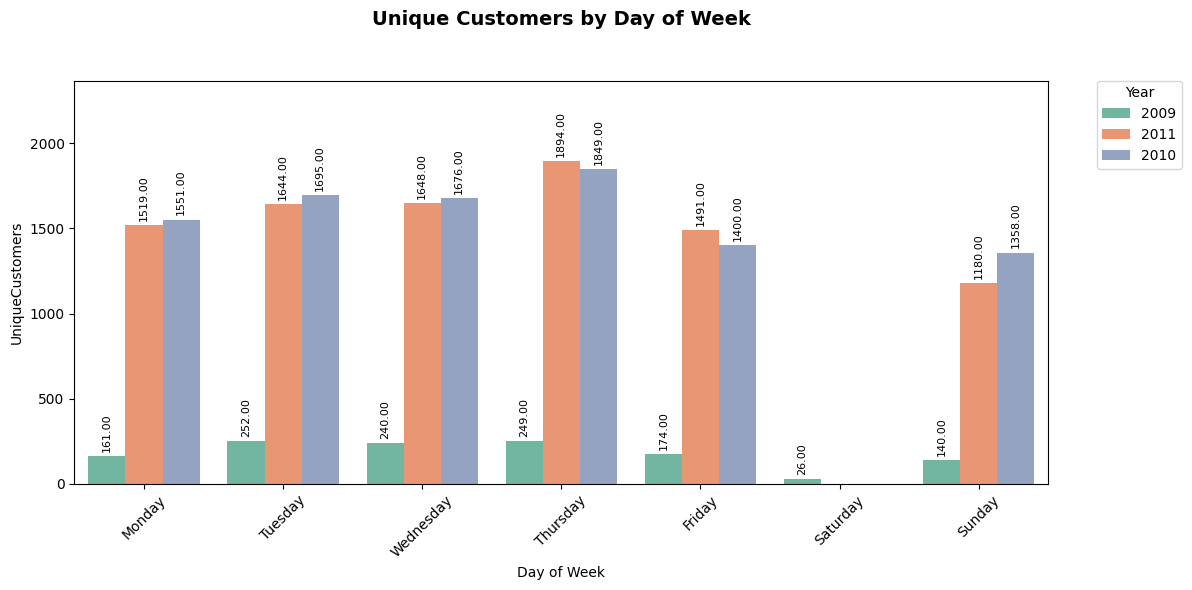

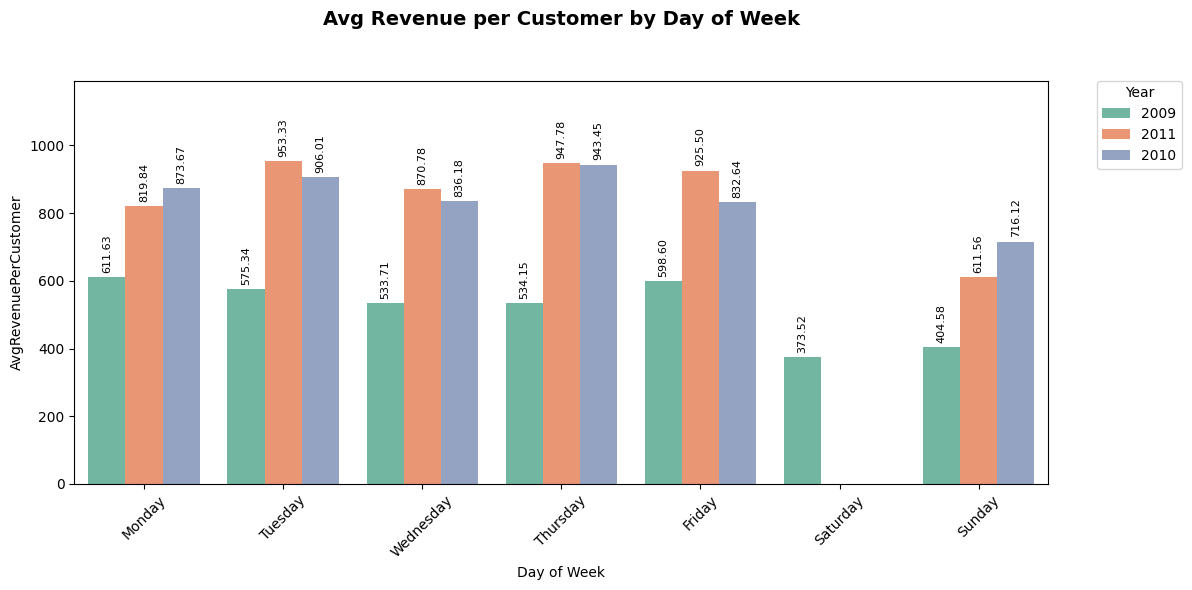

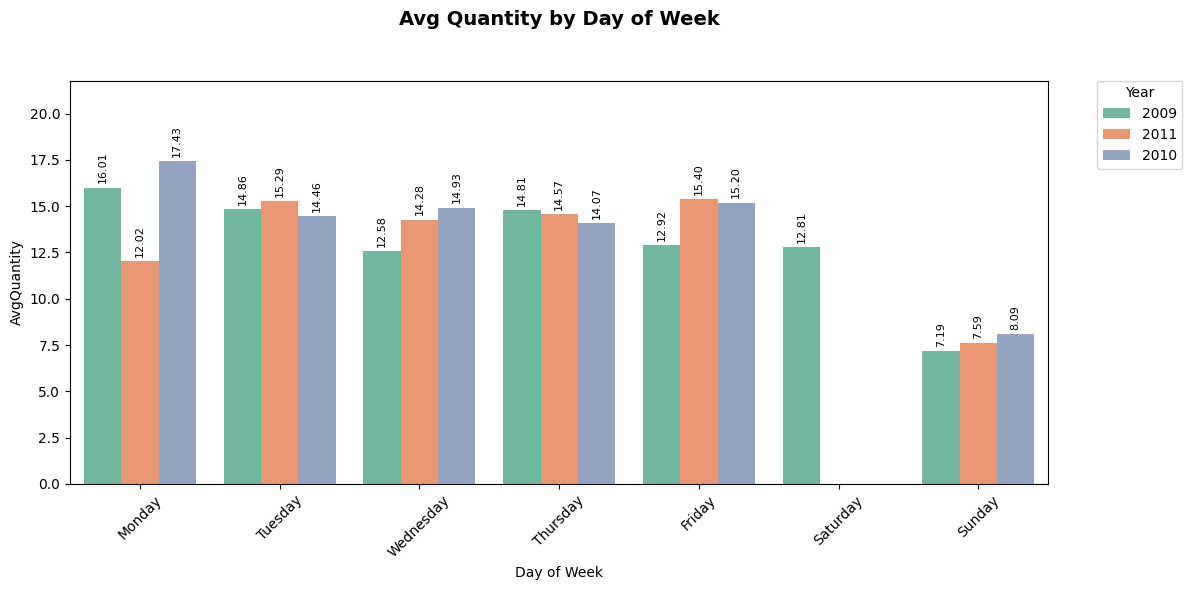

In [17]:
# ===================================================
# Step 4: Day of Week Comparison
# ===================================================

print("\n EDA Step 3.4: DAY OF THE WEEK COMPARISON (BY YEAR)")

# Aggregate by DayName
dayname_summary = df.groupby(['Year', 'DayName']).agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'InvoiceDate': 'count',
    'Quantity': ['sum', 'mean'],
    'Description': 'nunique',
    'CustomerID': 'nunique'
}).reset_index()

# Flatten columns
dayname_summary.columns = ['Year','DayName', 'TotalRevenue', 'InvoiceCount', 'TransactionCount',
                           'TotalQuantity', 'AvgQuantity',
                           'UniqueItemsSold', 'UniqueCustomers']

# Derived metrics
dayname_summary['AvgRevenuePerCustomer'] = dayname_summary['TotalRevenue'] / dayname_summary['UniqueCustomers']
dayname_summary['AvgRevenuePerCustomer'] = dayname_summary['AvgRevenuePerCustomer'].round(2)
dayname_summary['AvgQuantity'] = dayname_summary['AvgQuantity'].round(2)

# Sort by logical weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dayname_summary['DayName'] = pd.Categorical(dayname_summary['DayName'], categories=weekday_order, ordered=True)
dayname_summary = dayname_summary.sort_values('DayName')

# Force Year to categorical
dayname_summary['Year'] = dayname_summary['Year'].astype(str)

# Plot visual
titles = [
    'Revenue by Day of Week',
    'Transactions by Day of Week',
    'Invoices by Day of Week',
    'Quantity by Day of Week',
    'Unique Items Sold by Day of Week',
    'Unique Customers by Day of Week',
    'Avg Revenue per Customer by Day of Week',
    'Avg Quantity by Day of Week'
]

metrics = ['TotalRevenue', 'TransactionCount', 'InvoiceCount', 'TotalQuantity',
           'UniqueItemsSold', 'UniqueCustomers', 'AvgRevenuePerCustomer',
           'AvgQuantity']


for i, metric in enumerate(metrics):
    plt.figure(figsize=(12, 6))  # Wider canvas
    ax = sns.barplot(data=dayname_summary, x='DayName', y=metric, hue='Year', palette='Set2')

    # Rotate bar labels vertically and lift them higher
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, rotation=90, padding=3)

    # Adjust y-axis to give labels breathing room
    max_y = dayname_summary[metric].max()
    ax.set_ylim(0, max_y * 1.25)

    # Title and axis labels
    plt.title(titles[i], fontsize=14, weight='bold', pad=40)  # Increased padding
    plt.xlabel('Day of Week')
    plt.ylabel(metric.replace('_', ' '))
    plt.xticks(rotation=45)

    # Move legend outside the plot
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout()
    plt.show()


 EDA Step 3.5: HOUR OF DAY COMPARISON — This view reflects 2011 behavior


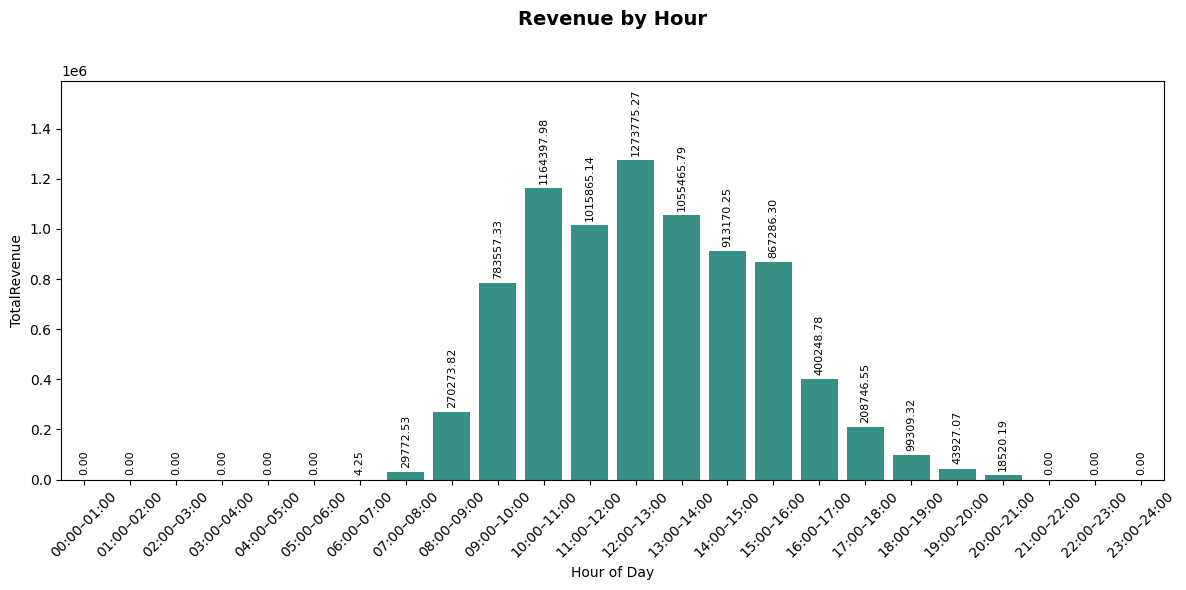

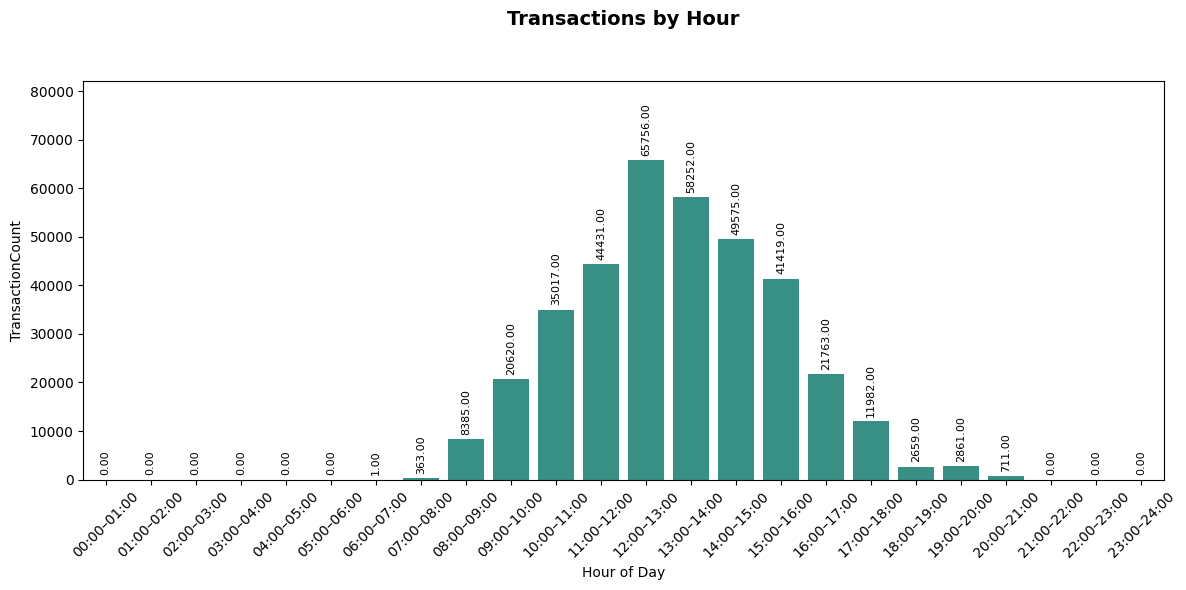

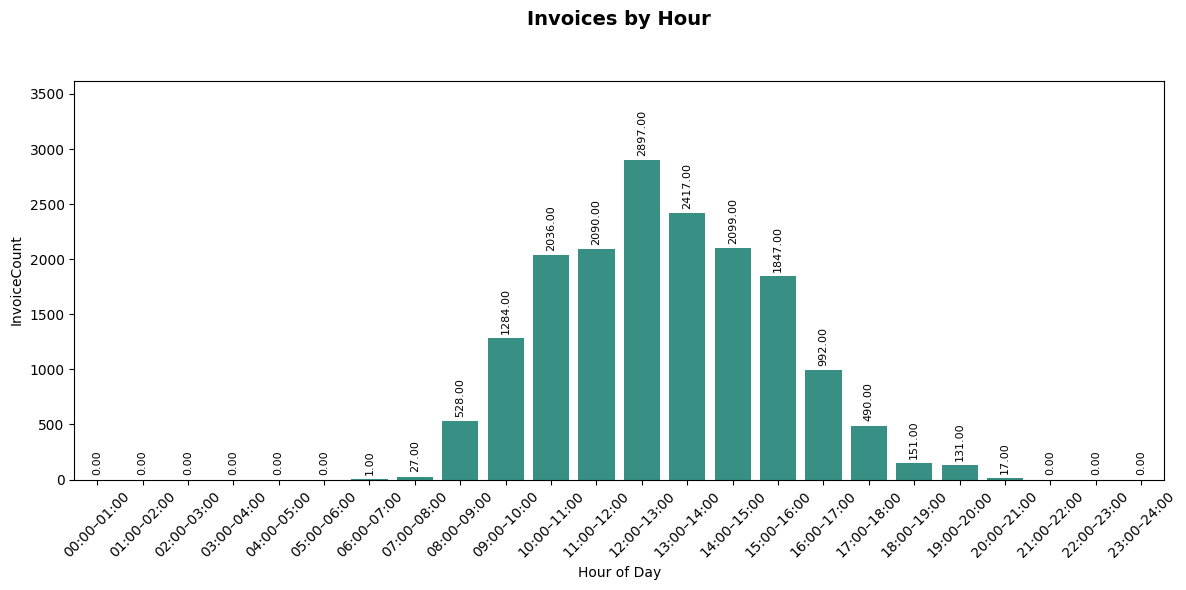

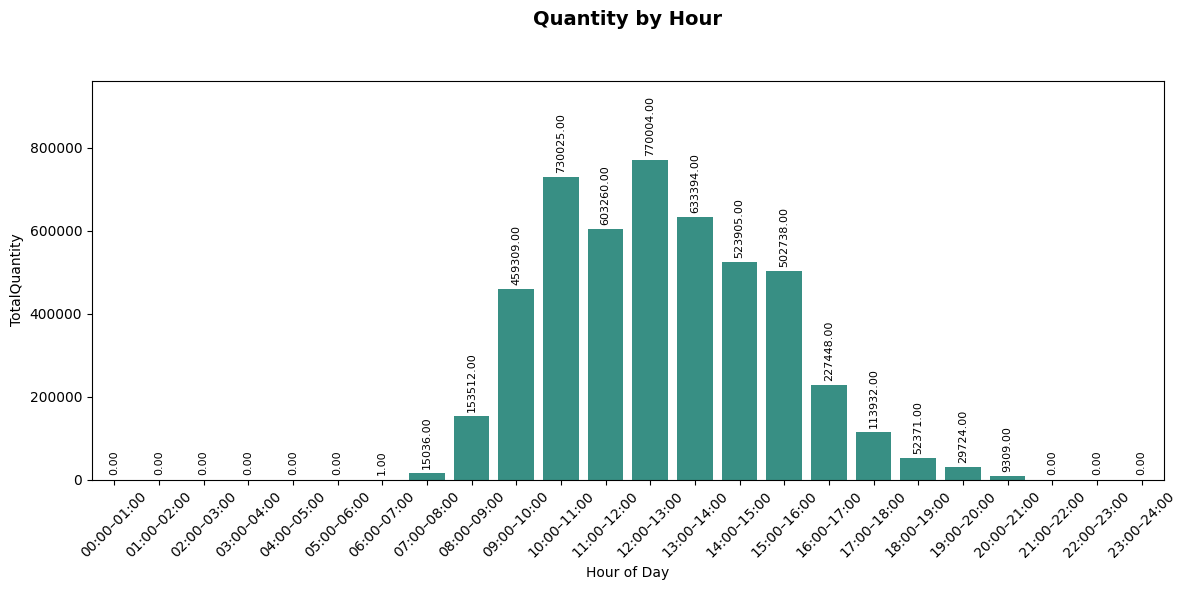

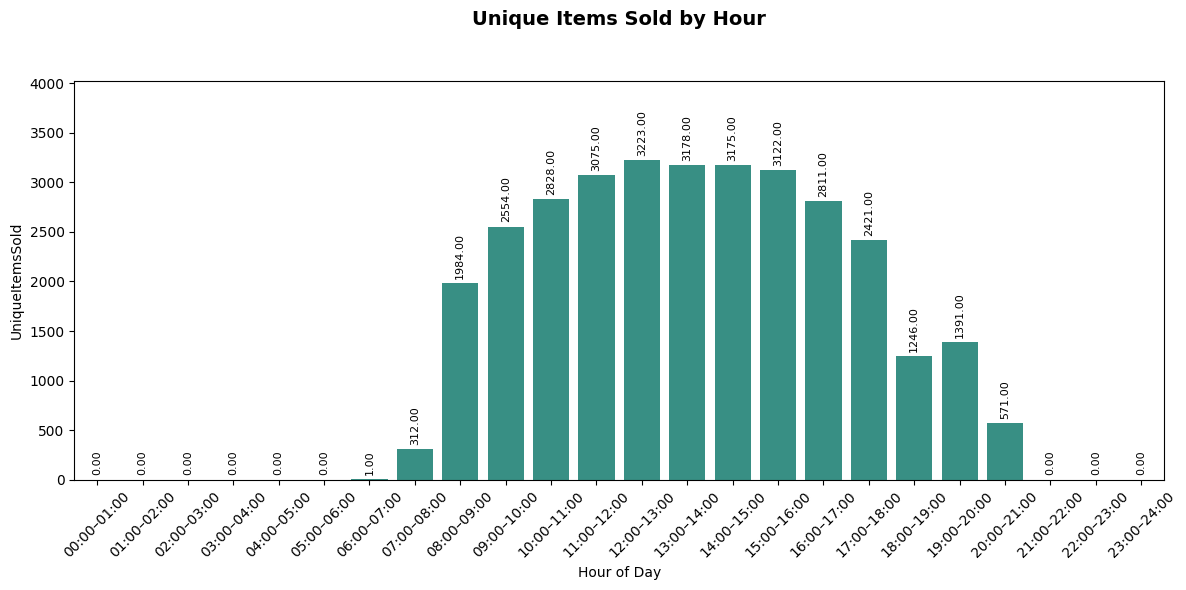

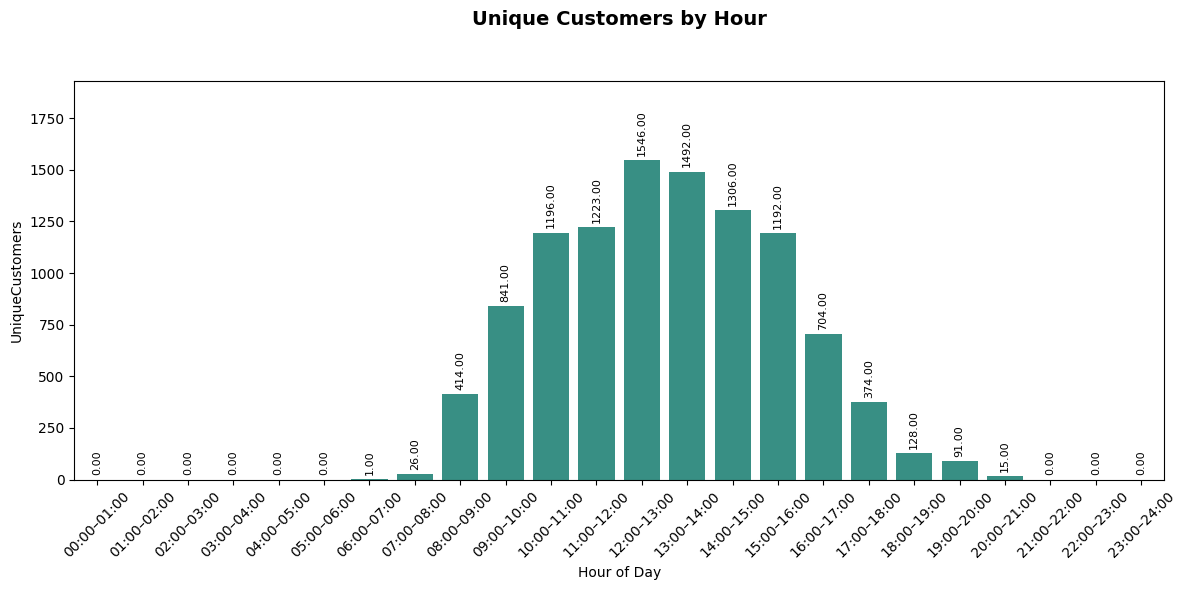

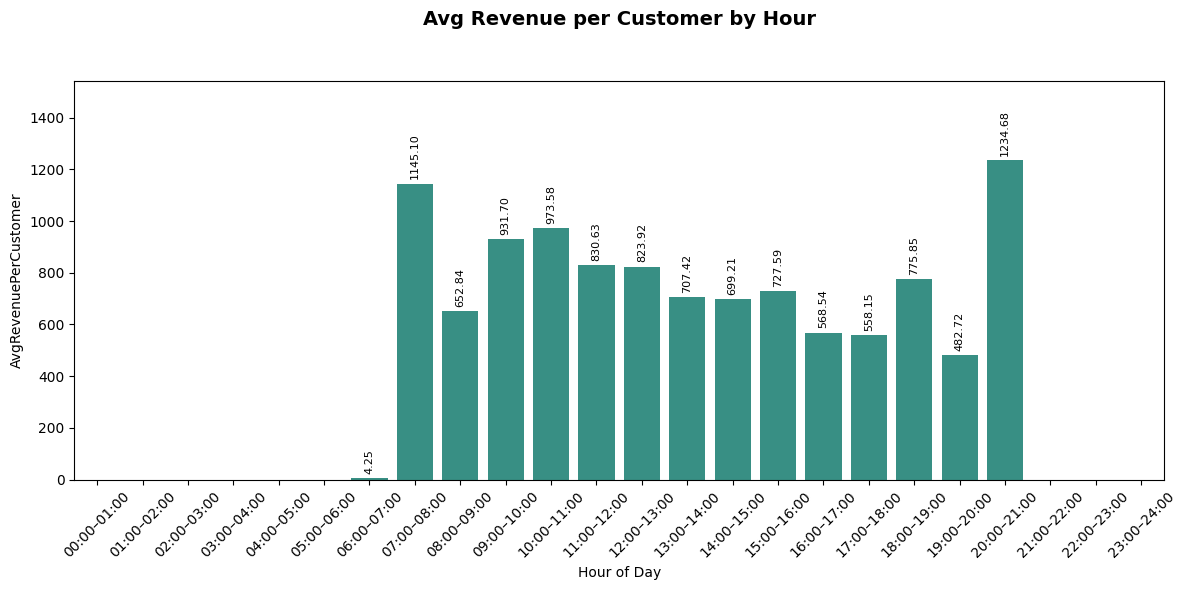

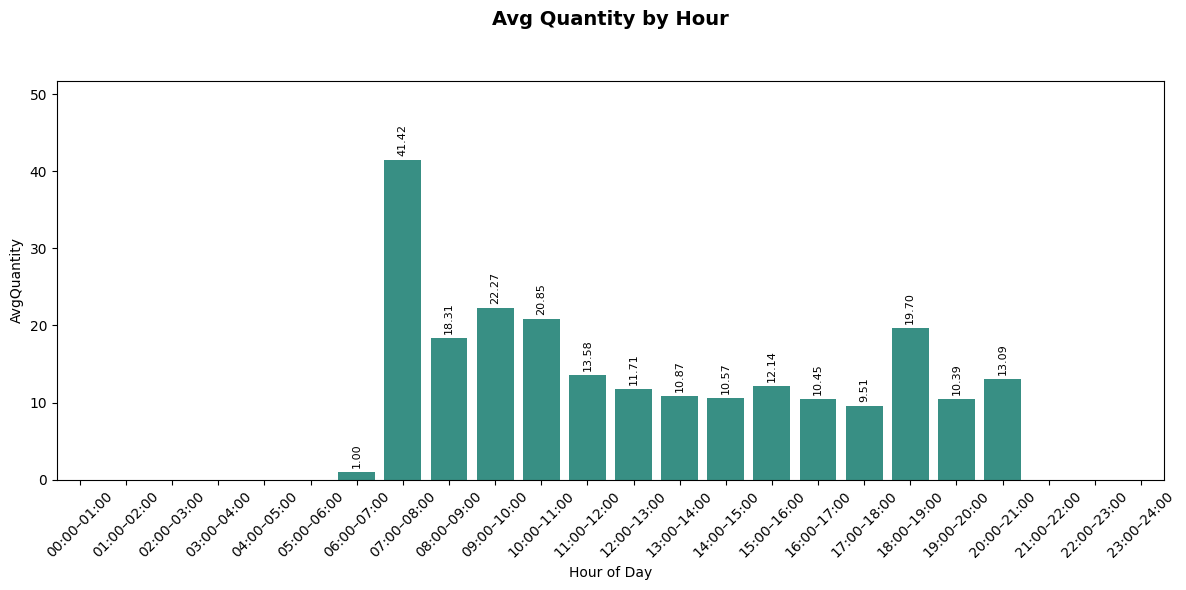

In [18]:
# ===================================================
# Step 5: Hour of Day Comparison: This view reflects 2011 behavior. For interactive breakdowns, see dashboard.
# ===================================================

print("\n EDA Step 3.5: HOUR OF DAY COMPARISON — This view reflects 2011 behavior")

# Filter for 2011 only
df_2011 = df[df['Year'] == 2011]

# Aggregate by HourBin
hour_summary = df_2011.groupby('HourBin').agg({
    'Revenue': 'sum',
    'Invoice': 'nunique',
    'InvoiceDate': 'count',
    'Quantity': ['sum', 'mean'],
    'Description': 'nunique',
    'CustomerID': 'nunique'
}).reset_index()

# Flatten columns
hour_summary.columns = ['HourBin', 'TotalRevenue', 'InvoiceCount', 'TransactionCount',
                        'TotalQuantity', 'AvgQuantity',
                        'UniqueItemsSold', 'UniqueCustomers']

# Derived metrics
hour_summary['AvgRevenuePerCustomer'] = hour_summary['TotalRevenue'] / hour_summary['UniqueCustomers']
hour_summary['AvgRevenuePerCustomer'] = hour_summary['AvgRevenuePerCustomer'].round(2)
hour_summary['AvgQuantity'] = hour_summary['AvgQuantity'].round(2)

# Plot visual
titles = [
    'Revenue by Hour',
    'Transactions by Hour',
    'Invoices by Hour',
    'Quantity by Hour',
    'Unique Items Sold by Hour',
    'Unique Customers by Hour',
    'Avg Revenue per Customer by Hour',
    'Avg Quantity by Hour'
]

metrics = ['TotalRevenue', 'TransactionCount', 'InvoiceCount', 'TotalQuantity',
           'UniqueItemsSold', 'UniqueCustomers', 'AvgRevenuePerCustomer',
           'AvgQuantity']

for i, metric in enumerate(metrics):
    plt.figure(figsize=(12, 6))  # Wider canvas
    ax = sns.barplot(data=hour_summary, x='HourBin', y=metric, color='#2a9d8f')

    # Rotate bar labels vertically and lift them higher
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, rotation=90, padding=3)

    # Adjust y-axis to give labels breathing room
    max_y = hour_summary[metric].max()
    ax.set_ylim(0, max_y * 1.25)

    # Title and axis labels
    plt.title(titles[i], fontsize=14, weight='bold', pad=40)
    plt.xlabel('Hour of Day')
    plt.ylabel(metric.replace('_', ' '))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


 EDA Step 4: GEOGRAPHIC ANALYSIS (BY YEAR)


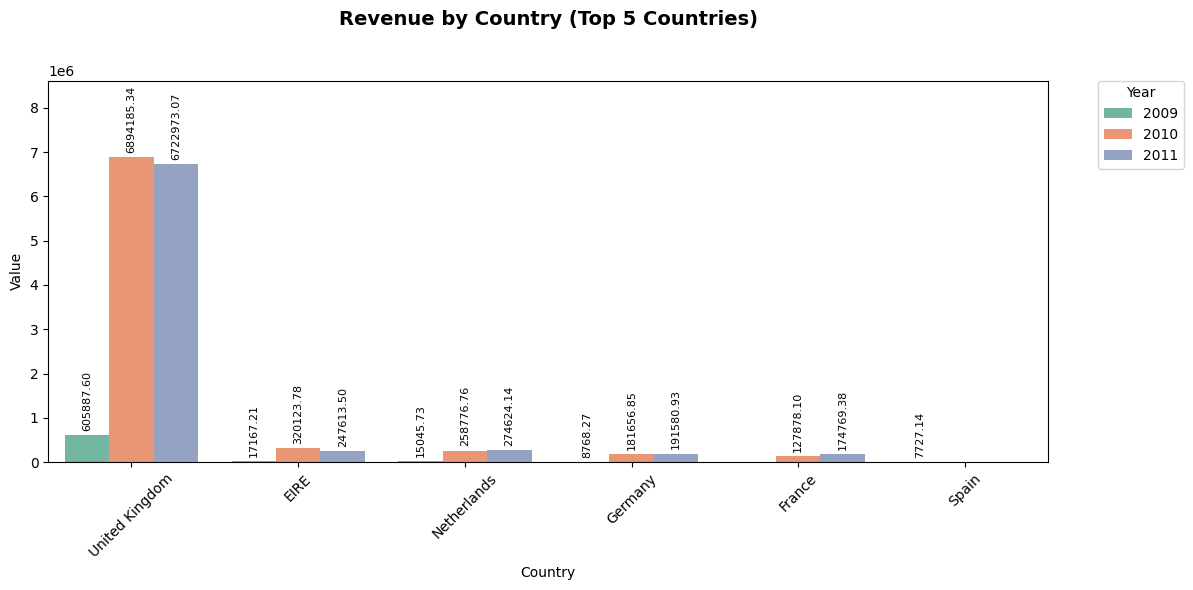

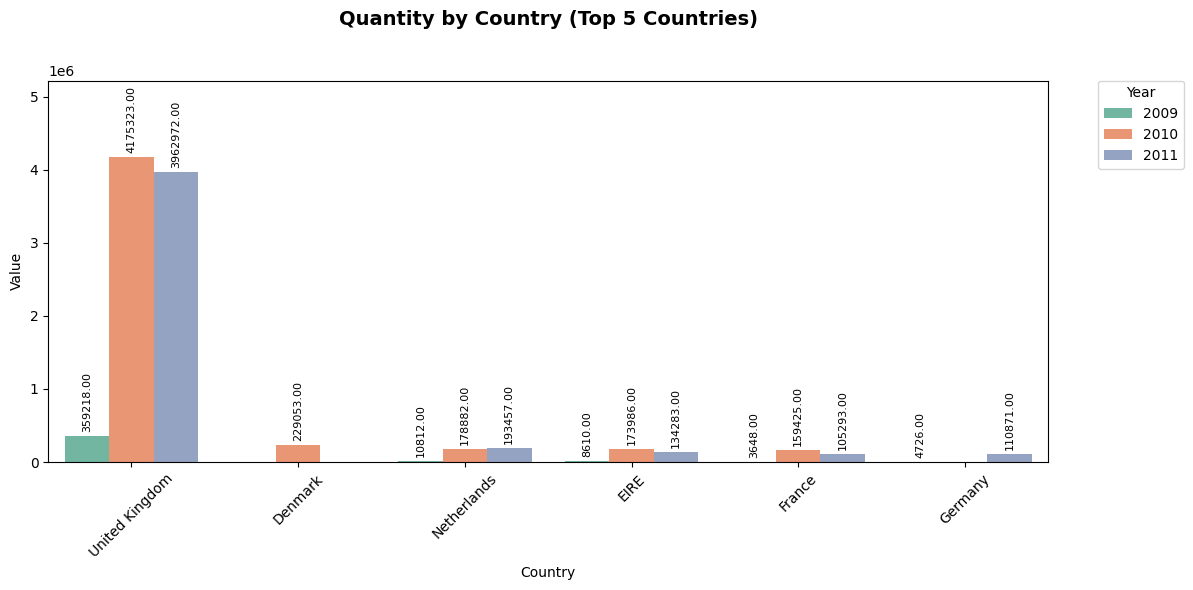

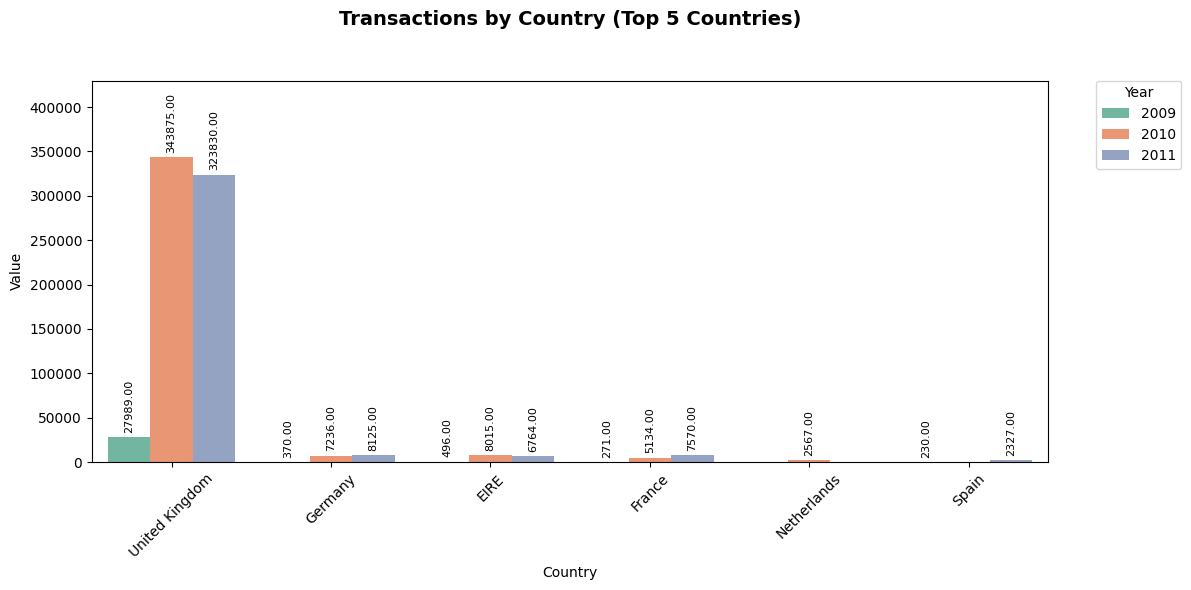

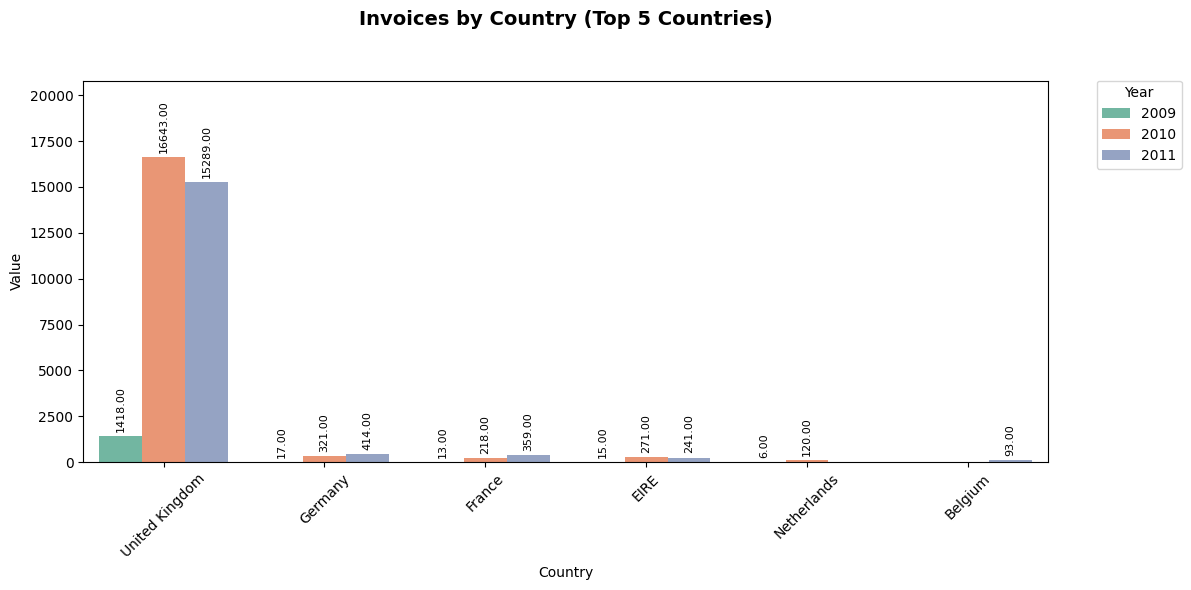

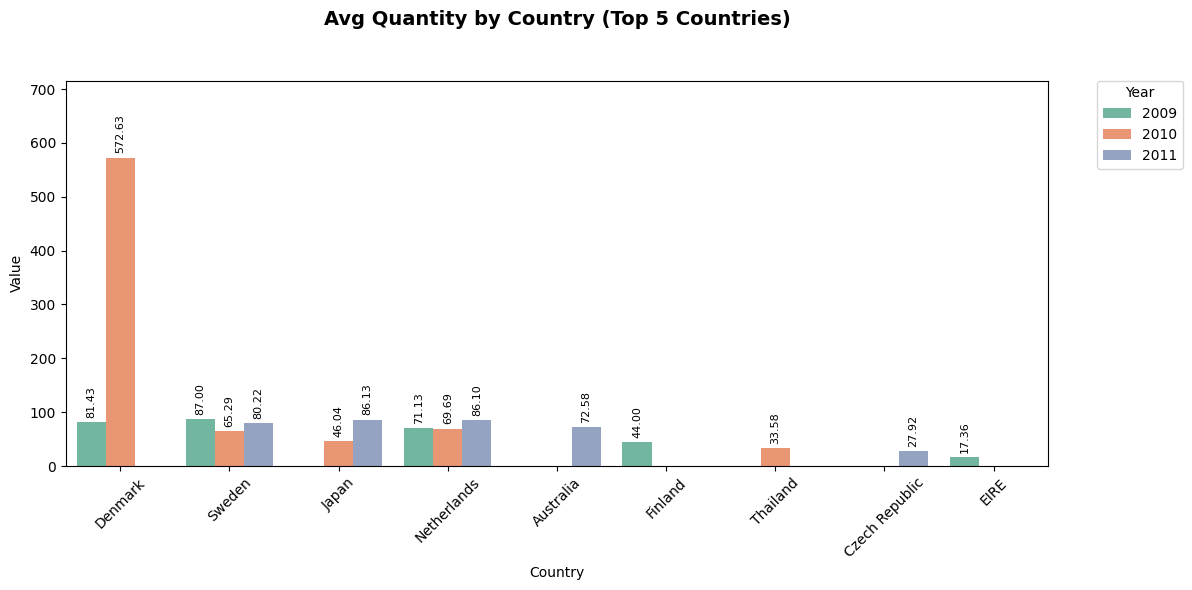

In [19]:
# ===================================================
# EDA Step 4: Geographic Analysis
# ===================================================
print("\n EDA Step 4: GEOGRAPHIC ANALYSIS (BY YEAR)")

# Force Year to categorical before grouping
df['Year'] = df['Year'].astype(str)

# Group by Year and Country
country_year_group = df.groupby(['Year', 'Country'])

# Metrics (rounded to 2 decimals)
revenue_by_country = country_year_group['Revenue'].sum().round(2).reset_index()
quantity_by_country = country_year_group['Quantity'].sum().round(2).reset_index()
transactions_by_country = country_year_group.size().reset_index(name='TransactionCount')
invoices_by_country = country_year_group['Invoice'].nunique().reset_index()
avg_quantity_by_country = country_year_group['Quantity'].mean().round(2).reset_index()


# Plot visual
metrics = {
    'Revenue by Country': revenue_by_country,
    'Quantity by Country': quantity_by_country,
    'Transactions by Country': transactions_by_country,
    'Invoices by Country': invoices_by_country,
    'Avg Quantity by Country': avg_quantity_by_country
}


# Define consistent year order and color mapping
year_order = ['2009', '2010', '2011']
year_palette = {'2009': '#66c2a5', '2010': '#fc8d62', '2011': '#8da0cb'}  # Set2-inspired, fixed

# Plot each metric with Seaborn + Matplotlib
for title, df_metric in metrics.items():
    # Sort by value descending and keep top 5 per year
    df_top5 = df_metric.sort_values(by=df_metric.columns[-1], ascending=False).groupby('Year').head(5)

    # Ensure consistent year order
    df_top5['Year'] = pd.Categorical(df_top5['Year'], categories=year_order, ordered=True)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_top5, x='Country', y=df_top5.columns[-1], hue='Year',
                     palette=year_palette)

    # Rotate bar labels vertically and lift them higher
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, rotation=90, padding=3)

    # Adjust y-axis to give labels breathing room
    max_y = df_top5[df_top5.columns[-1]].max()
    ax.set_ylim(0, max_y * 1.25)

    # Title and axis labels
    plt.title(title + ' (Top 5 Countries)', fontsize=14, weight='bold', pad=40)
    plt.xlabel('Country')
    plt.ylabel('Value')
    plt.xticks(rotation=45)

    # Move legend outside the plot
    handles, labels = ax.get_legend_handles_labels()
    ordered_handles = [handles[year_order.index(y)] for y in year_order if y in labels]
    ordered_labels = [y for y in year_order if y in labels]
    plt.legend(ordered_handles, ordered_labels, title='Year',
               bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout()
    plt.show()


 EDA Step 5: ITEM/PRODUCT BEHAVIOUR (BY YEAR)

 We anchor product comparisons in revenue to surface the items that move the business, not just the ones that move frequently.


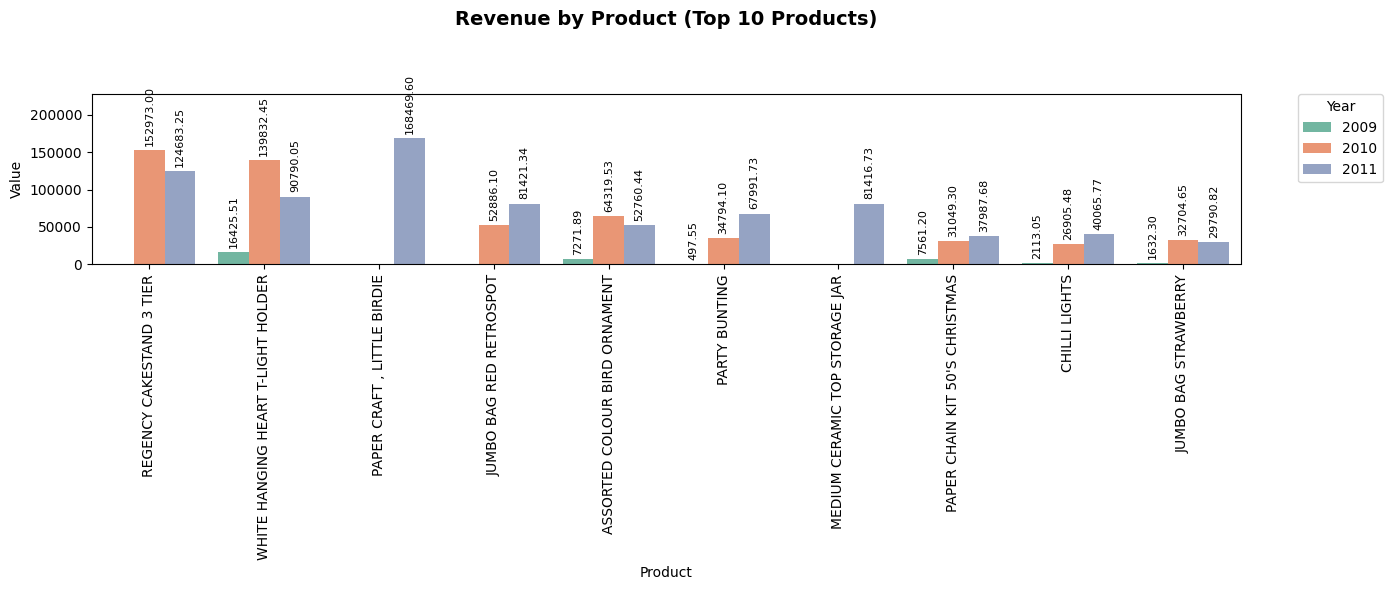

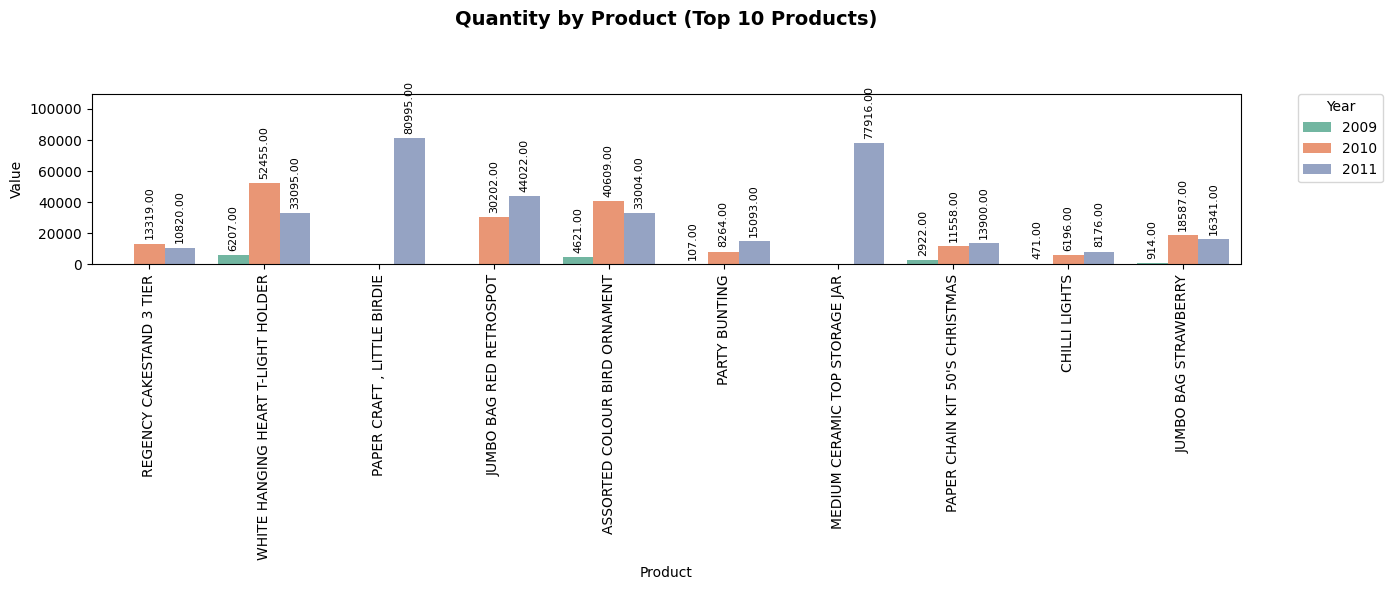

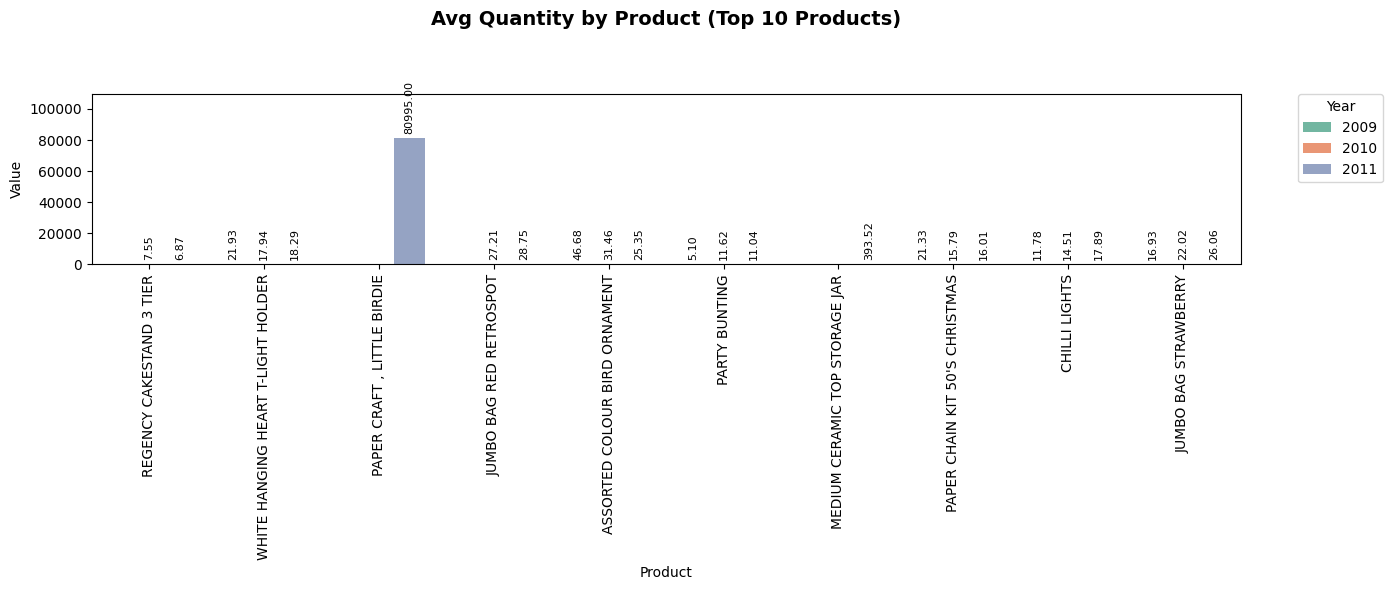

In [20]:
# ===================================================
# EDA Step 5: Item/Product Behaviour (BY YEAR)
# ===================================================
print("\n EDA Step 5: ITEM/PRODUCT BEHAVIOUR (BY YEAR)")
print("\n We anchor product comparisons in revenue to surface the items that move the business, not just the ones that move frequently.")

# Ensure Year is categorical
df['Year'] = df['Year'].astype(str)

# Group by Year and Product
product_year_group = df.groupby(['Year', 'Description'])

# Aggregate metrics
revenue_by_product = product_year_group['Revenue'].sum().round(2).reset_index()
quantity_by_product = product_year_group['Quantity'].sum().round(2).reset_index()
avg_quantity_by_product = product_year_group['Quantity'].mean().round(2).reset_index()

# Filter top 10 products by total revenue across all years
top_products = (
    df.groupby('Description')['Revenue'].sum()
    .sort_values(ascending=False)
    .head(10)
    .index.tolist()
)

# Sort top products by total revenue for consistent x-axis order
product_order = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).loc[top_products].index.tolist()

# Plot visual
metrics = {
    'Revenue by Product': revenue_by_product[revenue_by_product['Description'].isin(top_products)],
    'Quantity by Product': quantity_by_product[quantity_by_product['Description'].isin(top_products)],
    'Avg Quantity by Product': avg_quantity_by_product[avg_quantity_by_product['Description'].isin(top_products)]
}

# Define consistent year order and color mapping
year_order = ['2009', '2010', '2011']
year_palette = {'2009': '#66c2a5', '2010': '#fc8d62', '2011': '#8da0cb'}  # Set2-inspired, fixed

for title, df_metric in metrics.items():
    # Apply consistent product order
    df_metric['Description'] = pd.Categorical(df_metric['Description'], categories=product_order, ordered=True)
    df_metric = df_metric.sort_values('Description')

    # Ensure consistent year order
    df_metric['Year'] = pd.Categorical(df_metric['Year'], categories=year_order, ordered=True)

    plt.figure(figsize=(14, 6))  # Wider canvas for long product names
    ax = sns.barplot(data=df_metric, x='Description', y=df_metric.columns[-1], hue='Year',
                     palette=year_palette)

    # Rotate bar labels vertically and lift them higher
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, rotation=90, padding=3)

    # Adjust y-axis to give labels breathing room above bars
    max_y = df_metric[df_metric.columns[-1]].max()
    ax.set_ylim(0, max_y * 1.35)

    # Title and axis labels
    plt.title(title + ' (Top 10 Products)', fontsize=14, weight='bold', pad=50)
    plt.xlabel('Product')
    plt.ylabel('Value')
    plt.xticks(rotation=90, ha='center')  # Full vertical rotation for clarity

    # Move legend outside the plot with consistent order
    handles, labels = ax.get_legend_handles_labels()
    ordered_handles = [handles[year_order.index(y)] for y in year_order if y in labels]
    ordered_labels = [y for y in year_order if y in labels]
    plt.legend(ordered_handles, ordered_labels, title='Year',
               bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.tight_layout()
    plt.show()

<a id="correlation"></a>  
## Correlation Analysis

Analyse how different product metrics relate to each other—for example, whether higher prices tend to reduce quantity sold, or whether frequently purchased items also generate high revenue. 


 CORRELATION ANALYSIS


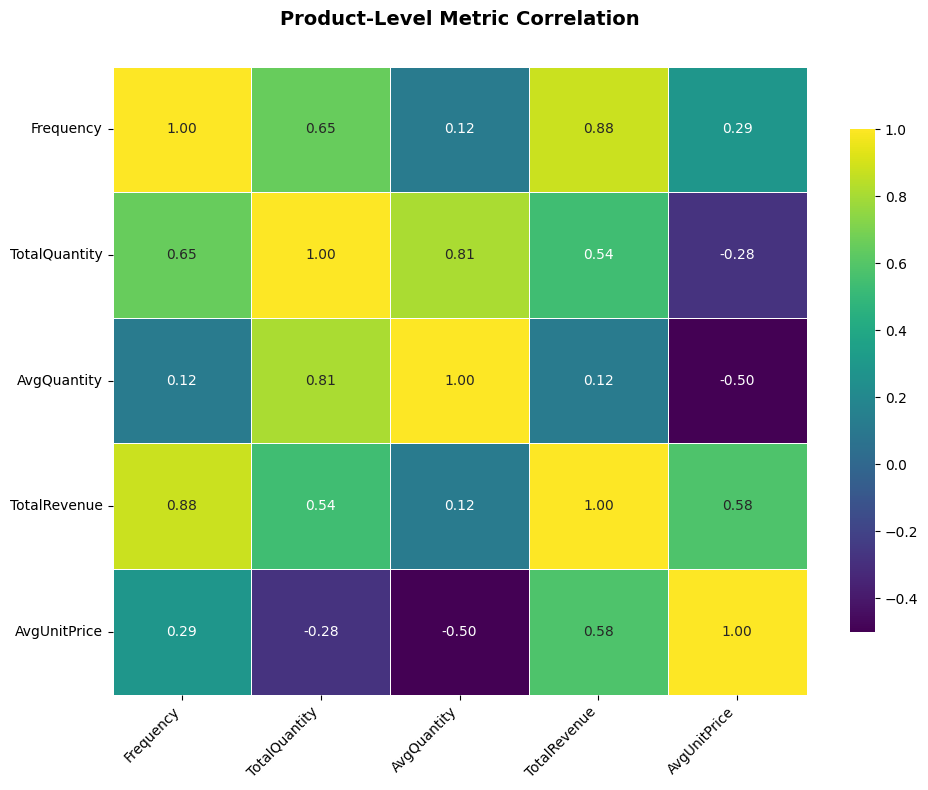

In [21]:
# ===================================================
# Correlation Analysis
# ===================================================

print("\n CORRELATION ANALYSIS")

# Focus on top N products by frequency
top_n = 30
top_products = df['Description'].value_counts().head(top_n).index
df_top = df[df['Description'].isin(top_products)]

# Aggregate metrics per product
product_metrics = df_top.groupby('Description').agg({
    'Invoice': 'count',  # Frequency
    'Quantity': ['sum', 'mean'],
    'Revenue': 'sum',
    'UnitPrice': 'mean'
}).reset_index()

# Flatten columns
product_metrics.columns = ['Product', 'Frequency', 'TotalQuantity', 'AvgQuantity',
                           'TotalRevenue', 'AvgUnitPrice']

# Round for clarity
product_metrics = product_metrics.round(2)

# Compute correlation matrix
corr_matrix = product_metrics.drop(columns='Product').corr().round(2)

# Plot with Seaborn + Matplotlib
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='viridis',
                 linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8})

# Title and layout
plt.title('Product-Level Metric Correlation', fontsize=14, weight='bold', pad=30)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Correlation Insights

| Metric Pair                  | Correlation | Interpretation                                                                 |
|-----------------------------|-------------|----------------------------------------------------------------------------------|
| **Frequency ↔ TotalRevenue** | **0.88**     | Strong positive: frequently purchased products tend to generate high revenue     |
| **Frequency ↔ TotalQuantity**| **0.65**     | Moderate positive: more frequent purchases often mean higher total quantities    |
| **Frequency ↔ AvgUnitPrice**| **0.29**     | Weak positive: frequent items slightly lean toward higher prices, but not tightly linked  |
| **AvgQuantity ↔ TotalQuantity**| **0.81** | Strong positive: products with higher average quantities also have high totals   |
| **AvgUnitPrice ↔ TotalRevenue**| **0.58** | Moderate positive: higher-priced items tend to drive more revenue, but not always  |
| **AvgUnitPrice ↔ AvgQuantity**| **–0.50** | Moderate negative: higher-priced items are typically bought in smaller quantities|

---

### Summary

- **Revenue is driven by both frequency and quantity**, not just price  
- **High-priced items** tend to be purchased in **lower volumes**, suggesting premium positioning  
- **Frequency is a reliable anchor** for behavioral engagement—it correlates strongly with both revenue and quantity  
- **AvgQuantity is tightly linked to TotalQuantity**, confirming metric integrity

> “Top products win through consistent engagement and volume. Frequency and quantity are the engines—price simply tunes the scale.”

In [22]:
# ============================================================
# Pre visualisation validation
# ============================================================

print("\n Pre visualisation validation")
# ============================================================
# Step 1: Column Normalization
# ============================================================

print("\n 1. Column Normalization")

import re

def camel_to_snake(name):
    """Convert camelCase or PascalCase to snake_case, preserving acronyms like ID"""
    name = name.replace('ID', 'Id')  # Prevent splitting 'ID' into 'i_d'
    name = re.sub(r'(?<=[a-z0-9])([A-Z])', r'_\1', name)  # Insert underscore
    name = re.sub(r'_+', '_', name).lower()  # Collapse underscores and lowercase
    return name.strip('_')

def normalize_dataframe(df):
    """Normalize column names in a DataFrame to snake_case."""
    df.columns = [camel_to_snake(col) for col in df.columns]
    return df

# Apply normalization
df = normalize_dataframe(df)

print("✅ Normalized columns in df:")
print(df.columns.tolist())

# ============================================================
# Step 2: Confirm Data Types
# ============================================================

print("\n 2. Confirm Data Types")

# year column is object so convert to int for ingestion
if df['year'].dtype != 'int':
    df['year'] = df['year'].astype(int)

# Convert month_year to Period if it's a YYYY-MM string
df['month_year'] = pd.to_datetime(df['month_year'], format='%Y-%m').dt.to_period('M')

print(df.info())


# ============================================================
# Step 3: Create Customer Dimension Table
# ============================================================

print("\n 3. Create Customer Dimension Table")

# Aggregate first and last seen dates per customer
customer_dim = df.groupby('customer_id').agg(
    first_seen=('invoice_date', 'min'),
    last_seen=('invoice_date', 'max')
).reset_index()


print("✅ Created customer_dim table:")
customer_dim.head()


 Pre visualisation validation

 1. Column Normalization
✅ Normalized columns in df:
['invoice', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'country', 'customer_id', 'revenue', 'revenue_outlier', 'quantity_outlier', 'unit_price_outlier', 'year', 'month', 'day', 'month_year', 'day_name', 'is_weekend', 'hour', 'hour_bin']

 2. Confirm Data Types
<class 'pandas.core.frame.DataFrame'>
Index: 772318 entries, 0 to 1067369
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   invoice             772318 non-null  object        
 1   stock_code          772318 non-null  object        
 2   description         772318 non-null  object        
 3   quantity            772318 non-null  int64         
 4   invoice_date        772318 non-null  datetime64[ns]
 5   unit_price          772318 non-null  float64       
 6   country             772318 non-null  object        
 7   c

,customer_id,first_seen,last_seen
0,12346,2010-03-02 13:08:00,2011-01-18 10:01:00
1,12347,2010-10-31 14:20:00,2011-12-07 15:52:00
2,12348,2010-09-27 14:59:00,2011-09-25 13:13:00
3,12349,2010-04-29 13:20:00,2011-11-21 09:51:00
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00


<a id="loyalty"></a>  
## Loyalty Segmentation (RFM)

Loyalty isn’t just about spending—it’s about **returning, engaging, and sustaining value**. RFM helps retailers move from guesswork to precision by:

- Spotting **high-value repeat buyers**
- Targeting **retention efforts** where they matter
- Flagging **churn risks** early
- Prioritizing **marketing spend**
- Building **emotional connection** through recognition

---

### What Is RFM?

**RFM** =  
- **Recency**: How recently a customer purchased  
- **Frequency**: How often they purchase  
- **Monetary**: How much they spend  

> Recency is calculated using the day after the last recorded transaction in the dataset—not today's actual date. This ensures that customer activity is measured relative to the most recent data available, avoiding false inactivity caused by outdated records.
---

### RFM Segments

| Segment         | Logic (R, F, M)                         | Interpretation                                                                |
|-----------------|------------------------------------------|------------------------------------------------------------------------------------|
| **Champions**     | R ≥ 4 and F ≥ 4 and M ≥ 4               | Recent, frequent, high spend—your VIPs                                             |
| **Loyalists**     | R ≥ 3 and F ≥ 3 and M ≥ 3               | Consistent and engaged across all metrics—prime for retention and upsell           |
| **At Risk**       | R = 2 and (F ≥ 3 or M ≥ 3)              | Previously engaged or high-value customers who’ve gone quiet—ideal for reactivation |
| **Low Value**     | R = 2 and F ≤ 2 and M ≤ 2               | Weak but more recent than Lost customers                                                            |
| **Lost**     | R = 1 (regardless of R or F)             | Dormant                                                           |
| **Monitor**       | Everyone else                          | Mixed signals—watch, guide, and test for potential    


### Loyalty Rank vs. Outreach Rank

- A **Champion** might be top in loyalty, but they don’t need urgent outreach—they’re already engaged.
- An **At Risk** customer might be lower in loyalty, but they’re the **most urgent** to target before they churn.

| Type               | Purpose                              | Based On                        | Used For                        |
|--------------------|---------------------------------------|----------------------------------|----------------------------------|
| **Loyalty Rank** | Who is most valuable to the business | RFM scores (high R, F, M)        | Recognition, retention tiers, long-term strategy |
| **Outreach Rank** | Who is most actionable right now     | Behavioral urgency (recency drop, reactivation potential) | Targeted outreach, short-term ROI, re-engagement |

---

### 🔝 Ranking of RFM Level Combinations

We’ll list all **27 RFM level combinations** using `recency_level`, `frequency_level`, and `monetary_level` columns, then assign a **rank from 1 to 27**, based on this priority:

- **Recency** = most important  
- **Frequency** = second  
- **Monetary** = third  

| RFM Rank | Recency | Frequency | Monetary |
|------|---------|-----------|----------|
| 1 | High | High | High |
| 2 | High | High | Medium |
| 3 | High | High | Low |
| 4 | High | Medium | High |
| 5 | High | Medium | Medium |
| 6 | High | Medium | Low |
| 7 | High | Low | High |
| 8 | High | Low | Medium |
| 9 | High | Low | Low |
| 10 | Medium | High | High |
| 11 | Medium | High | Medium |
| 12 | Medium | High | Low |
| 13 | Medium | Medium | High |
| 14 | Medium | Medium | Medium |
| 15 | Medium | Medium | Low |
| 16 | Medium | Low | High |
| 17 | Medium | Low | Medium |
| 18 | Medium | Low | Low |
| 19 | Low | High | High |
| 20 | Low | High | Medium |
| 21 | Low | High | Low |
| 22 | Low | Medium | High |
| 23 | Low | Medium | Medium |
| 24 | Low | Medium | Low |
| 25 | Low | Low | High |
| 26 | Low | Low | Medium |
| 27 | Low | Low | Low |


 Loyalty Segmentation: OVERALL RFM SNAPSHOT


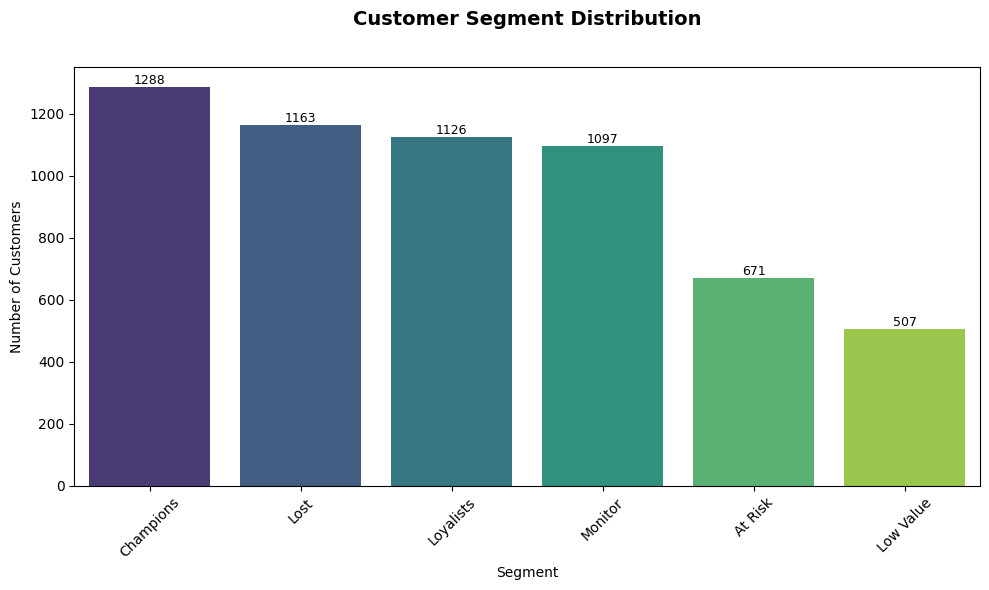

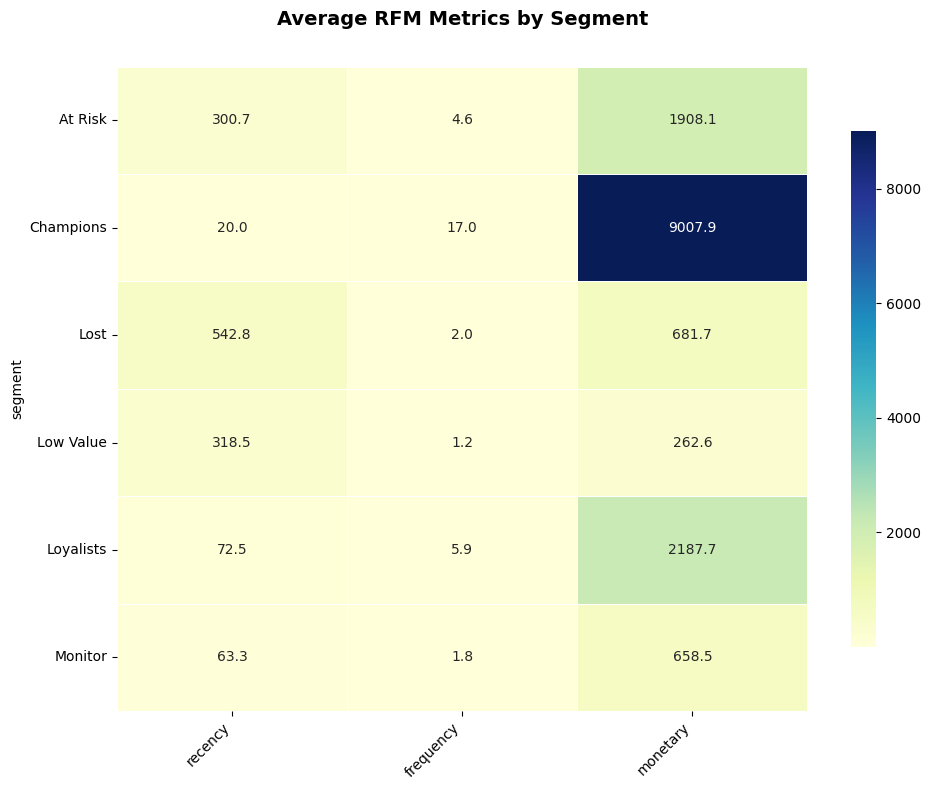

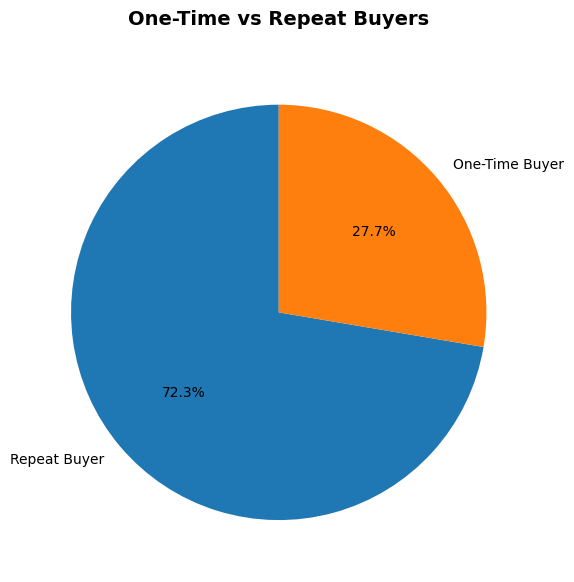

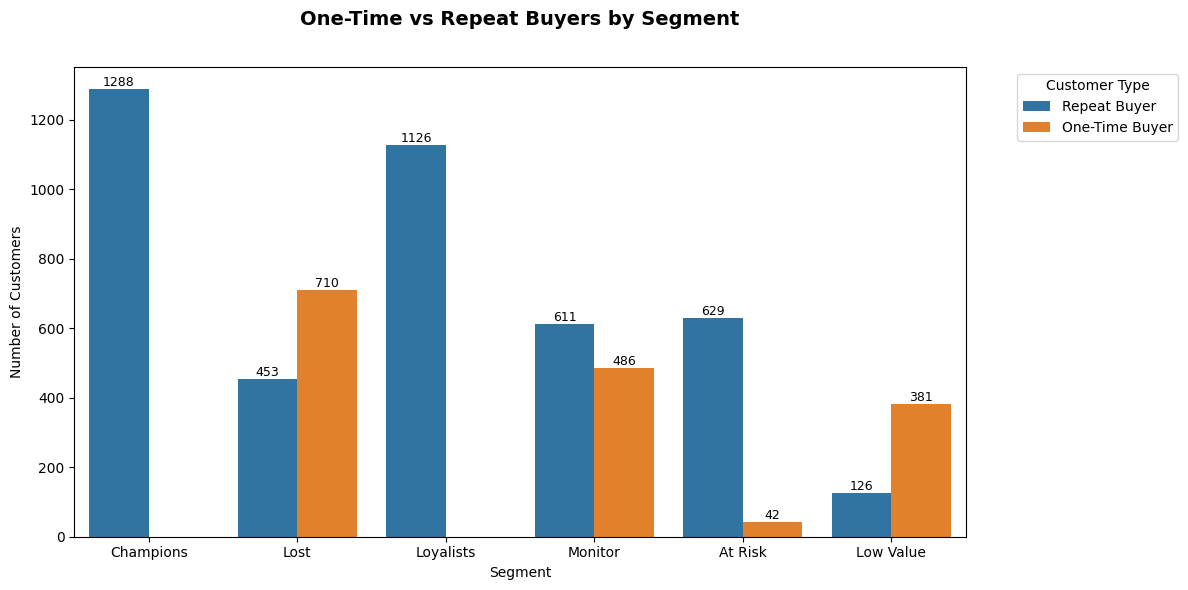

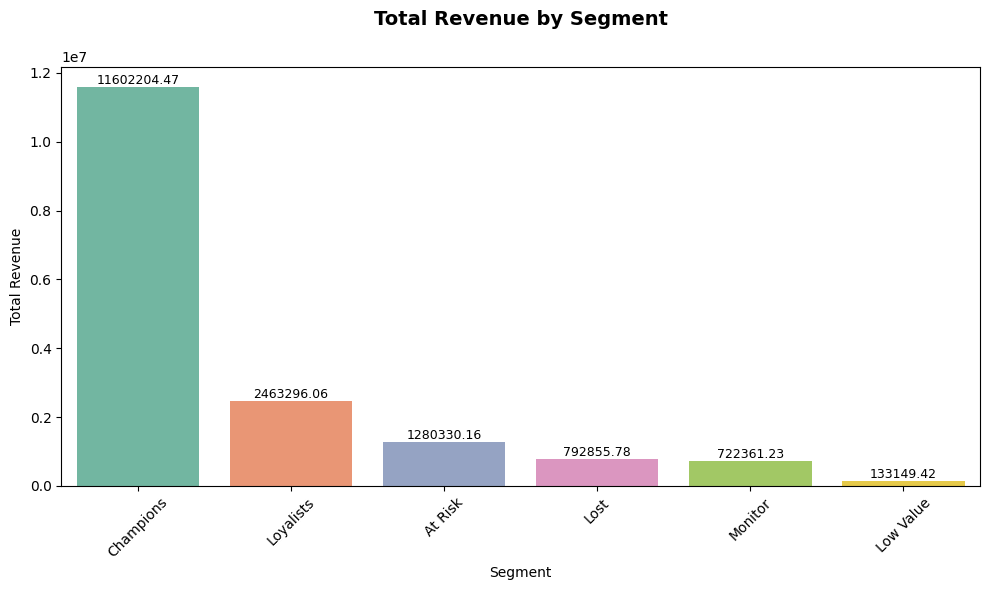


 RFM table:


,customer_id,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,rfm_avg,recency_level,frequency_level,monetary_level,rfm_level,rfm_level_rank,segment,campaign_priority,loyalty_priority,outreach_rank,loyalty_rank,customer_type
0,12346,326,3,77352.96,2,3,5,235,3.33,Low,Medium,High,"Low recency, Medium frequency, High monetary",22,At Risk,1,3,122,322,Repeat Buyer
1,12347,2,8,4921.53,5,4,5,545,4.67,High,High,High,"High recency, High frequency, High monetary",1,Champions,3,1,301,101,Repeat Buyer
2,12348,75,5,1658.40,3,4,4,344,3.67,Medium,High,High,"Medium recency, High frequency, High monetary",10,Loyalists,2,2,210,210,Repeat Buyer
3,12349,19,3,3663.39,5,3,5,535,4.33,High,Medium,High,"High recency, Medium frequency, High monetary",4,Loyalists,2,2,204,204,Repeat Buyer
4,12350,310,1,294.40,2,1,2,212,1.67,Low,Low,Low,"Low recency, Low frequency, Low monetary",27,Low Value,5,5,527,527,One-Time Buyer


In [23]:
# ===================================================
# Overall RFM Snapshot 
# ===================================================

print("\n Loyalty Segmentation: OVERALL RFM SNAPSHOT")

# Create safety copy for RFM logic
rfm = df.copy()

# ===================================================
# Step 1: RFM Calculation
# ===================================================

# Reference date for recency
reference_date = rfm['invoice_date'].max() + pd.Timedelta(days=1)

# Group by customer_id
rfm = rfm.groupby('customer_id').agg({
    'invoice_date': lambda x: (reference_date - x.max()).days,  # Recency
    'invoice': 'nunique',                                       # Frequency
    'revenue': 'sum'                                            # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# ===================================================
# Step 2: RFM Scoring (1–5)
# ===================================================

rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

rfm['rfm_score'] = rfm['r_score'].astype(str) + rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm['rfm_avg'] = rfm[['r_score', 'f_score', 'm_score']].mean(axis=1).round(2)

# ===================================================
# Step 2.5: RFM Level Classification and Segment rank
# ===================================================

import pandas as pd
import itertools

# Step 1: Define level mapping function
def score_level(score):
    if score <= 2:
        return 'Low'
    elif score == 3:
        return 'Medium'
    else:
        return 'High'

# Step 2: Apply level mapping to your RFM scores
rfm['recency_level'] = rfm['r_score'].apply(score_level)
rfm['frequency_level'] = rfm['f_score'].apply(score_level)
rfm['monetary_level'] = rfm['m_score'].apply(score_level)

rfm['rfm_level'] = (
    rfm['recency_level'] + ' recency, ' +
    rfm['frequency_level'] + ' frequency, ' +
    rfm['monetary_level'] + ' monetary'
)

# Step 3: Generate all 27 RFM level combinations
levels = ['High', 'Medium', 'Low']
rfm_combos = list(itertools.product(levels, repeat=3))

rfm_rank_df = pd.DataFrame(rfm_combos, columns=['recency_level', 'frequency_level', 'monetary_level'])

# Step 4: Assign weights and compute priority score
priority_order = {'High': 3, 'Medium': 2, 'Low': 1}

rfm_rank_df['priority_score'] = (
    rfm_rank_df['recency_level'].map(priority_order) * 100 +
    rfm_rank_df['frequency_level'].map(priority_order) * 10 +
    rfm_rank_df['monetary_level'].map(priority_order)
)

# Step 5: Rank combinations manually
rfm_rank_df['rfm_level_rank'] = rfm_rank_df['priority_score'].rank(method='dense', ascending=False).astype(int)

# Step 6: Create readable label
rfm_rank_df['rfm_level'] = (
    rfm_rank_df['recency_level'] + ' recency, ' +
    rfm_rank_df['frequency_level'] + ' frequency, ' +
    rfm_rank_df['monetary_level'] + ' monetary'
)

# Step 7: Join back to main RFM table
rfm = rfm.merge(rfm_rank_df[['rfm_level', 'rfm_level_rank']], on='rfm_level', how='left')

# ===================================================
# Step 3: Segment Assignment (Conditional Logic)
# ===================================================

def assign_segment(row):
    r, f, m = row['r_score'], row['f_score'], row['m_score']
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 3 and f >= 3 and m >= 3:
        return 'Loyalists'
    elif r == 2 and (f >= 3 or m >= 3):
        return 'At Risk'
    elif r == 2 and f <= 2 and m <= 2:
        return 'Low Value'
    elif r == 1:
        return 'Lost'
    else:
        return 'Monitor'

rfm['segment'] = rfm.apply(assign_segment, axis=1)


# ===================================================
# Step 4: Segment Distribution (Bar Chart)
# ===================================================

segment_counts = rfm['segment'].value_counts().reset_index()
segment_counts.columns = ['segment', 'count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=segment_counts, x='segment', y='count', palette='viridis')

# Annotate bars with count labels
for container in ax.containers:
    if container.datavalues is not None and len(container.datavalues) > 0:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.title('Customer Segment Distribution', fontsize=14, weight='bold', pad=30)
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===================================================
# Step 5: RFM Heatmap
# ===================================================

segment_summary = rfm.groupby('segment')[['recency', 'frequency', 'monetary']].mean().round(1)

plt.figure(figsize=(10, 8))
sns.heatmap(segment_summary, annot=True, fmt='.1f', cmap='YlGnBu',
            linewidths=0.5, linecolor='white', cbar_kws={'shrink': 0.8})

plt.title('Average RFM Metrics by Segment', fontsize=14, weight='bold', pad=30)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ===================================================
# Step 6: Segment-Based Priority Ranks for Outreach & Loyalty
# ===================================================

rfm['campaign_priority'] = rfm['segment'].map({
    'At Risk': 1,
    'Loyalists': 2,
    'Champions': 3,
    'Monitor': 4,
    'Low Value': 5,
    'Lost': 6
})

rfm['loyalty_priority'] = rfm['segment'].map({
    'Champions': 1,
    'Loyalists': 2,
    'At Risk': 3,
    'Monitor': 4,
    'Low Value': 5,
    'Lost': 6
})

rfm['outreach_rank'] = rfm['campaign_priority'] * 100 + rfm['rfm_level_rank']
rfm['loyalty_rank'] = rfm['loyalty_priority'] * 100 + rfm['rfm_level_rank']


# ===================================================
# Step 7: Flag one-time vs repeat customers
# ===================================================
rfm['customer_type'] = rfm['frequency'].apply(lambda x: 'One-Time Buyer' if x == 1 else 'Repeat Buyer')


# ===================================================
# Step 8: One-time vs Repeat Buyers (Pie Chart)
# ===================================================

customer_type_counts = rfm['customer_type'].value_counts().reset_index()
customer_type_counts.columns = ['customer_type', 'count']

plt.figure(figsize=(6, 6))
plt.pie(customer_type_counts['count'],
        labels=customer_type_counts['customer_type'],
        autopct='%1.1f%%',
        colors=['#1f77b4', '#ff7f0e'],
        startangle=90)

plt.title('One-Time vs Repeat Buyers', fontsize=14, weight='bold', pad=20)
plt.tight_layout()
plt.show()

# ===================================================
# Step 9: One-Time vs Repeat Buyers by Segment (Sorted by Repeat %)
# ===================================================

# Count buyer types per segment
segment_behavior = rfm.groupby(['segment', 'customer_type']).size().reset_index(name='count')

# Calculate total and percentage within each segment
segment_behavior['segment_total'] = segment_behavior.groupby('segment')['count'].transform('sum')
segment_behavior['percentage'] = (segment_behavior['count'] / segment_behavior['segment_total'] * 100).round(1)

# Sort segments by total customer count (descending)
segment_totals = segment_behavior.groupby('segment')['count'].sum().sort_values(ascending=False).reset_index()
segment_order = segment_totals['segment'].tolist()

# Apply sorted order
segment_behavior['segment'] = pd.Categorical(segment_behavior['segment'], categories=segment_order, ordered=True)
segment_behavior = segment_behavior.sort_values(by='segment')

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=segment_behavior, x='segment', y='count', hue='customer_type',
                 palette={'Repeat Buyer': '#1f77b4', 'One-Time Buyer': '#ff7f0e'})

# Annotate each bar with correct percentage
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            x = bar.get_x() + bar.get_width() / 2
            ax.text(x, height, f"{height:.0f}", ha='center', va='bottom', fontsize=9)

plt.title('One-Time vs Repeat Buyers by Segment', fontsize=14, weight='bold', pad=30)
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# ===================================================
# Step 10: Total Revenue by Segment (with Data Labels)
# ===================================================

# Aggregate and sort revenue by segment
segment_revenue = rfm.groupby('segment')['monetary'].sum().reset_index()
segment_revenue = segment_revenue.sort_values(by='monetary', ascending=False)

# Plot revenue bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=segment_revenue, x='segment', y='monetary', palette='Set2')

# Annotate bars with revenue labels
for container in ax.containers:
    if container.datavalues is not None and len(container.datavalues) > 0:
        ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9)

plt.title('Total Revenue by Segment', fontsize=14, weight='bold', pad=30)
plt.xlabel('Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n RFM table:")
display(rfm.head())

In [24]:
# ===================================================
# Save as csvs
# ===================================================

# Confirm rfm datatypes
print(rfm.info())

# ------------------------------------------------------------
# 🕒 Step 1: Create Timestamp for Versioning
# ------------------------------------------------------------
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M')

# ------------------------------------------------------------
# 💾 Step 2: Export All Tables with Timestamped Filenames
# ------------------------------------------------------------
df.to_csv(f'retail_{timestamp}.csv', index=False)         # Cleaned raw data
customer_dim.to_csv(f'customer_dim_{timestamp}.csv', index=False)  # Customer dimension table
rfm.to_csv(f'rfm_{timestamp}.csv', index=False)           # Enriched RFM segmentation table

# ------------------------------------------------------------
# ✅ Step 3: Confirm Success
# ------------------------------------------------------------
print(f"\n✅ All tables exported successfully with timestamp: {timestamp}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5852 non-null   object 
 1   recency            5852 non-null   int64  
 2   frequency          5852 non-null   int64  
 3   monetary           5852 non-null   float64
 4   r_score            5852 non-null   int64  
 5   f_score            5852 non-null   int64  
 6   m_score            5852 non-null   int64  
 7   rfm_score          5852 non-null   object 
 8   rfm_avg            5852 non-null   float64
 9   recency_level      5852 non-null   object 
 10  frequency_level    5852 non-null   object 
 11  monetary_level     5852 non-null   object 
 12  rfm_level          5852 non-null   object 
 13  rfm_level_rank     5852 non-null   int64  
 14  segment            5852 non-null   object 
 15  campaign_priority  5852 non-null   int64  
 16  loyalty_priority   5852 

<a id="dashboard-documentation"></a>
## Dashboard documentation

| KPIs | Description |
|-----|-------------|
| **Total Customers** | Number of unique customers |
| **Total Revenue** | Total income generated from all transactions |
| **Total Invoices** | Total number of distinct purchase events, each invoice represents one shopping session |
| **Total Quantity** | Total number of items purchased, across all products and customers|
| **Avg Revenue per Customer (ARPC)** |On average, how much revenue each customer brings in |
| **Basket Size** | Average number of items bought per shopping session, helps track basket size|
| **Repeat Purchase Rate (RPR)** | Percentage of customers who came back and bought more than once|
| **Purchase Frequency**  | On average, how many times each customer shops with us |
| **Average Order Value (AOV)**   | Average amount spent per shopping session, helps track spending behavior|

---
| Filters | Description |
|--------|-------------|
| **Customer ID** | Filter by individual customer |
| **Country** | Filter by customer location |
| **Product** | Filter by product purchased |
| **Customer Type** | Filter by repeat vs one-time buyer |
| **Loyalty Segment** | Filter by RFM-based loyalty classification |
| **Loyalty Level** | Filter by loyalty tier (e.g., High, Medium, Low) |
| **Month** | Filter by transaction month |
| **Year** | Filter by transaction year |

---

### 🔷 Page 1: **Loyalty Segmentation Overview**
> *Who are our loyal customers, and what value do they bring?*

| Visual | Description |
|--------|-------------|
| **Number of Customers by Loyalty Segment** | Who are our loyal customers? |
| **Revenue by Loyalty Segment** | Which segments drive revenue? |
| **Customers by Revenue (Filterable by Segment)** | Who are the most valuable customers in each loyalty segment?    |
| **Loyalty Composition by Country** | Which countries have the healthiest loyalty mix—and where should we intervene? |

---

### 🔷 Page 2: **Customer Behaviour Insights**
> *How do our customers behave across segments?*

| Visual | Description |
|--------|-------------|
| **Revenue Trends by Loyalty Segment** | Are segment revenues growing or declining? |
| **Basket Size by Loyalty Segment** | Are loyal customers buying more items per shopping session? |
| **Top Products by Quantity (Color-Coded for Bulk Buyers)**  | Top-selling products by quantity. What’s flying off the shelves? Each product is color-coded to show whether it’s bought by many customers or just a few bulk buyers.  |
| **Purchase Frequency per Product** | Which products do customers keep coming back for? Products bought by fewer than 13 customers are excluded to ensure frequency reflects true behavioral loyalty |

---

### 🔷 Page 3: **Customer Loyalty Table**
> *What’s the RFM logic and segment assignment per customer?*

| Visual | Description |
|--------|-------------|
| **Customer Loyalty Table** | Full transparency into RFM scores and segment logic |

<a id="key-insights"></a>  
## 🔑 Key Insights

The goal isn’t just to describe loyalty. It’s to segment it, quantify its impact, and act on it.

Here’s what the data reveals:


### Key Performance Indicators (KPIs)

| KPI | Value |
|-----|-------|
| Total Customers | 5,852 |
| Total Revenue | £17.0M |
| Total Invoices | 36,582 |
| Total Quantity | 10.5M |
| Basket Size | 286.2 |
| ARPC (Avg Revenue per Customer) | £2,904 |
| Purchase Frequency | 6.25 |
| Repeat Purchase Rate | 72.33% |
| Avg Order Value | £464.6 |

The business attracts repeat buyers with strong basket sizes and frequent purchases. But loyalty isn’t evenly spread, and that’s where the story begins.

---

### 1. Champions Drive 68% of Revenue but Only 22% of Customers

- Just **1,288 Champions** generate **£11.6M**, the majority of revenue.
- This small group is your growth engine.
- If they churn, the impact is massive. If nurtured, the upside is even bigger.

---

### 2. Loyalists and At Risk Customers Hold £3.8M in Value

- **Loyalists (19%) and At Risk (11%)** are still active and spending.
- Loyalists are your “almost Champions”, but At Risk customers are fragile.
- Retention here offers high leverage.

---

### 3. Lost Customers Contributed £793K

- Though inactive, the **Lost segment (20%)** left a meaningful revenue footprint.
- These customers had meaningful spend before disengaging.
- Their history justifies targeted win-back campaigns, especially those with high basket sizes or sticky product behavior.

---

### 4. Thursday Is the Top Revenue Day Every Year

- Weekdays outperform weekends consistently.
- **Thursday leads across all years**, likely tied to restocking or pre-weekend buying.
- Campaigns and inventory should align with this midweek surge.

---

### 5. 11AM–12PM Is the Peak Shopping Hour

- This hour sees the **highest invoices, quantities, and revenue**.
- Activity builds from 8AM, peaks midday, and drops after 2PM.
- Ideal timing for flash sales, email drops, or support coverage.

---

### 6. Bulk Buyers Skew Product Popularity

- Top-selling items like **PAPER CRAFT, LITTLE BIRDIE** are driven by a few bulk buyers.
- Others like **lunch boxes and record frames** are bought repeatedly by many.
- Segmenting products by buyer type helps tailor promotions and bundles.

---

### 7. Lost Customers Had the Largest Basket Size

| Segment | Basket Size |
|---------|-------------|
| Lost | 340.5 |
| Champions | 315.3 |
| At Risk | 241.2 |
| Loyalists | 228.6 |
| Monitor | 218.9 |
| Low Value | 120.5 |

- Lost customers bought more per basket than any other segment.
- This suggests they were high-engagement buyers who churned.
- High volume doesn’t guarantee loyalty. Churn may have been driven by friction, unmet expectations, or lack of follow-up.

---

### 8. Repeat Products Show Strong Loyalty Signals

| Product | Purchase Frequency |
|---------|--------------------|
| RECORD FRAME 7" SINGLE | 4.83 |
| LUNCH BOX I LOVE LONDON | 4.79 |
| DOLLY GIRL LUNCH BOX | 4.63 |
| BLACK RECORD COVER FRAME | 4.50 |
| COOK WITH WINE METAL SIGN | 4.21 |
| CHILLI LIGHTS | 4.04 |

- These products are bought again and again, excluding bulk buyers.
- They’re **loyalty anchors**, ideal for bundling, upsell, and retention campaigns.

---

### 9. The UK Is the Primary Market and Loyalty Is Strong

- The **UK accounts for the majority of customers**, making it the core market for loyalty strategy.
- Within the UK, loyalty density is high.**Champions and Loyalists make up a significant share of the customer base**.
- This signals strong engagement and repeat behavior in the primary market.
- Loyalty efforts should focus on **reinforcing UK retention**, while tailoring re-engagement strategies for smaller regions.

---

### 10. Outreach Rank Helps Prioritize Retention

| Segment | Priority |
|---------|----------|
| At Risk | 🔴 Urgent, still active, but drifting |
| Loyalists | Valuable, protect them |
| Champions | High-value, reinforce loyalty |
| Monitor | Fragile, watch closely |
| Low Value | Minimal leverage |
| Lost | Inactive, reactivate selectively

- **At Risk customers are still reachable**. This is your core retention battleground.
- Champions and Loyalists deserve reinforcement to protect long-term value.

---

<a id="recommendations"></a>  
## ✅ Recommendations

| Segment or Signal | Recommended Action | Estimated Impact |
|-------------------|---------------------|------------------|
| **At Risk Customers** | Launch retention campaigns with personalized bundles | ↑ retention, ↓ churn risk |
| **Loyalists** | Offer early access to new arrivals and bundle sticky products (e.g. lunch boxes + record frames) | ↑ repeat rate, ↑ revenue |
| **Champions** | Protect with loyalty perks, feedback loops, and priority access | ↑ lifetime value, ↓ churn risk |
| **Lost Customers with High Basket Size** | Selectively deploy win-back emails referencing past spend | ↑ reactivation, ↑ CLV |
| **Bulk-Driven Products** | Flag SKUs bought by <13 customers and adjust pricing/messaging for bulk buyers | ↑ margin clarity, ↓ product distortion |
| **Sticky Products (high repeat rate)** | Feature in homepage bundles and loyalty campaigns (e.g. RECORD FRAME 7" SINGLE + BLACK RECORD COVER FRAME) | ↑ AOV, ↑ retention |
| **Thursday + 11AM–12PM peak** | Schedule flash sales, email drops, and inventory restocks for Thursday mornings | ↑ conversion, ↓ missed opportunity |
| **UK Loyalty Density** | Focus retention efforts on UK Champions and Loyalists with tailored messaging and perks | ↑ relevance, ↑ retention in core market |

---

<a id="client-scenario"></a>  
## Client Scenario: Applying the Recommendations

A founder opens the loyalty dashboard and sees that **Champions drive 68% of revenue**, while **At Risk and Loyalists still hold £3.8M in active value**. Instead of treating all customers the same, they act with precision:

### 🎯 Goal: Retain High-Value Customers Before They Slip—and Reactivate Selectively

1. **Re-engage At Risk Customers with Product-Based Offers**  
   Customers who bought CHILLI LIGHTS or COOK WITH WINE METAL SIGN are offered bundle discounts. These are familiar items with high repeat potential.

2. **Reward Loyalists with Early Access and Sticky Bundles**  
   Loyalists receive early access to new arrivals and curated bundles featuring RECORD FRAME 7" SINGLE and DOLLY GIRL LUNCH BOX, products they’ve bought repeatedly.

3. **Protect Champions with Exclusive Perks**  
   Champions are invited to a feedback loop and offered priority access to seasonal launches. Their loyalty is reinforced with recognition and rewards.

4. **Selectively Win Back Lost Customers with High Spend**  
   Lost customers with basket sizes over £300 are sent “We Miss You” emails referencing their past purchases and offering a tailored discount. Only those with high historical value are targeted.

5. **Segment Bulk Buyers for Strategic Pricing**  
   Products like WW2 Gliders, bought by <13 customers, are flagged for bulk pricing and B2B messaging, avoiding distortion in retail metrics.

6. **Feature Sticky Products in Loyalty Campaigns**  
   High-frequency items are bundled and promoted in loyalty emails and homepage features, driving repeat purchases and increasing AOV.

7. **Time Campaigns for Thursday at 11AM**  
   Flash sales and email drops are scheduled for Thursday mornings, when invoice volume and revenue peak. This aligns with real shopping behavior.

8. **Double Down on UK Retention**  
   With most customers in the UK, retention efforts focus here, reinforcing loyalty among Champions and Loyalists with tailored messaging and perks.

<a id="tech-stack"></a>
## ⚙️ Tech Stack

- **Python** – Data cleaning, EDA, correlation and RFM
- **Kaggle Notebook** – End-to-end workflow combining code, analysis, and documentation
- **Tableau Public** – Interactive dashboard visuals

<a id="workflow"></a>
## 🔄 Workflow

1. **Raw Data** → [Kaggle Dataset: Online Retail II UCI](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci)  
2. **Data Cleaning & Preprocessing** → Performed in Python (Pandas) to handle missing values, fix formatting, and prepare data for analysis.  
3. **Exploratory Data Analysis (EDA)** → Conducted in Python using Pandas for aggregations and Matplotlib/Seaborn for identifying trends and patterns.
4. **RFM segmentation** → Calculated Recency, Frequency, and Monetary scores to segment customer loyalty,
5. **Visualization & Storytelling** → Built charts in Tableau to present insights in a clear, business-focused manner.  

<a id="lets-connect"></a>
## 🔗 Let’s Connect

Feel free to connect, follow, or support:  

[![LinkedIn](https://img.shields.io/badge/LinkedIn-Connect-blue?style=flat&logo=linkedin)](https://linkedin.com/in/wilfridawere/)  

[![Twitter](https://img.shields.io/badge/X-Follow-black?style=flat&logo=twitter)](https://x.com/wilfridawere)  

[![Website](https://img.shields.io/badge/Website-Visit-orange?style=flat&logo=google-chrome)](https://www.wilfridawere.com/)  

[![Kaggle](https://img.shields.io/badge/Kaggle-Follow-blue?style=flat&logo=kaggle)](https://kaggle.com/wilfridawere)  

[![GitHub](https://img.shields.io/badge/GitHub-Projects-black?style=flat&logo=github)](https://github.com/Wilfrida-Were)  